# EDA (Exploratory Data Analysis)

## Summary

Data forecasting - the process of using historical and current data to predict future events or trends, employing statistical models and AI/ML techniques to identify patterns and extrapolate them into educated guesses about what might happen next. It serves as a critical planning tool for businesses and other sectors to anticipate change, manage resources, and make informed strategic decisions, though accuracy depends on data quality and chosen methods. 

READING ALL THE REQUIRED LIBRARIES AND PACKAGES

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import multiprocessing as mp
from tqdm import tqdm

In [3]:
df = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\calendar.csv')
df1 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_validation.csv') # Used for training
df2 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sell_prices.csv')
df3 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_evaluation.csv') # Used for testing

In [4]:
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


We can observe that 4 entries (event_name_1, event_name_2, event_type_1, event_name_2) contain NaN(Not a Number) value

In [5]:
df1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


Overall we have sales for 1919 days

In [6]:
df2.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [7]:
df3.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


However in the dataset above, we have sales data for 1947 days. Which is why I want to use this dataframe for testing

In [8]:
print("Shape of calendar.csv", df.shape)
print("Shape of sales_train_validation.csv", df1.shape)
print("Shape of sell_prices.csv", df2.shape)
print("Shape of sales_train_evaluation.csv", df3.shape)

Shape of calendar.csv (1969, 14)
Shape of sales_train_validation.csv (30490, 1919)
Shape of sell_prices.csv (6841121, 4)
Shape of sales_train_evaluation.csv (30490, 1947)


Let's not forget that in calendar.csv file we have many entries with NaN value. Instead we can say that those entries are not available

In [9]:
df = df.fillna(value = 'N/A')

In [10]:
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,N/A,N/A,N/A,N/A,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,N/A,N/A,N/A,N/A,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,N/A,N/A,N/A,N/A,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,N/A,N/A,N/A,N/A,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,N/A,N/A,N/A,N/A,1,0,1


We need to have days as particular columns, so I had to modify sales_train_evaluation.csv file and assign the changed structure of it.

In [11]:
df1 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_validation.csv')
l=[]
for i in range(1,1914):
    l.append("d_"+str(i))
df_final=pd.melt(df1,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
    value_vars=l,var_name="d",value_name="sales")

This is increasing the size of csv file massively, but I don't need that much data.I am taking only last 28 data days of test because eariler values are same as for train

In [12]:
df3 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_evaluation.csv')
l=[]
for i in range(1914,1942):
    l.append("d_"+str(i))
df_final_test=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
    value_vars=l,var_name="d",value_name="sales")

In [13]:
for i in range(1942,1970):
    df3['d_'+str(i)]=0

Now we create the future data that are going to be used for future sales data

In [14]:
l=[]
for i in range(1942,1970):
    l.append("d_"+str(i))
df_future_data=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
    value_vars=l,var_name="d",value_name="sales")  

Let's merge all 3 dfs so we can get the final csv file train

In [15]:
df = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\calendar.csv')
df2 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sell_prices.csv')

In [16]:
data=df_final.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data=data.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv
data.to_csv('final_dataframe.csv',index=False)

In [17]:
#Now we merge all These 3 dataframes to get final csv file test
data_test=df_final_test.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_test=data_test.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv
data_test.to_csv('final_dataframe_test.csv',index=False)

In [18]:
#Now we merge all These 3 dataframes to get final csv file future data
data_future=df_future_data.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_future=data_future.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_future_data.csv
data_future.fillna('no_event',inplace=True)
data_future.to_csv('final_future_data.csv',index=False)

In [19]:
print("Shape of final dataframe train is=",data.shape)
print("Shape of final dataframe test is=",data_test.shape)

Shape of final dataframe train is= (46027957, 22)
Shape of final dataframe test is= (853720, 22)


We can see that the amount of data is huge

In [20]:
#reading up complete dataframe
data=pd.read_csv('final_dataframe.csv')
data_test=pd.read_csv('final_dataframe_test.csv')


C:\Users\Wiktor\AppData\Local\Temp\ipykernel_1792\1915225771.py:2: DtypeWarning: Columns (14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('final_dataframe.csv')
C:\Users\Wiktor\AppData\Local\Temp\ipykernel_1792\1915225771.py:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test=pd.read_csv('final_dataframe_test.csv')
C:\Users\Wiktor\AppData\Local\Temp\ipykernel_1792\1915225771.py:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test=pd.read_csv('final_dataframe_test.csv')


EXPLORING VARIOUS PROPERTIES OF DF

In [21]:
print("Head rows of Final DataFrame train")
data.head()

Head rows of Final DataFrame train


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.56
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.17
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,5.98
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70


In [22]:
print("Columns present in dataFrame are",data.columns.values)

Columns present in dataFrame are ['id' 'item_id' 'dept_id' 'cat_id' 'store_id' 'state_id' 'd' 'sales'
 'date' 'wm_yr_wk' 'weekday' 'wday' 'month' 'year' 'event_name_1'
 'event_type_1' 'event_name_2' 'event_type_2' 'snap_CA' 'snap_TX'
 'snap_WI' 'sell_price']


In [23]:
print("Here the is a complete information about data Frame is:-\n")
print(data.info())

Here the is a complete information about data Frame is:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 7.5+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 22 column

Clearly this data frame is using a lot memory(7.5+GB) so we will try to remove unnecessary features

In [24]:
print("There are these unique stores in this data=",data['store_id'].unique())

There are these unique stores in this data= ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [25]:
print("There are these states in data=",data['state_id'].unique())

There are these states in data= ['CA' 'TX' 'WI']


In [26]:
print("Unique values of wday features=",data['wday'].unique())
print("Unique values of weekday features=",data['weekday'].unique())

Unique values of wday features= [1 2 3 4 5 6 7]
Unique values of weekday features= ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique values of weekday features= ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [27]:
print("Years for which I have this sales data=",data['year'].unique())

Years for which I have this sales data= [2011 2012 2013 2014 2015 2016]


In [28]:
print("Months in year 2016 for which we have data",data[data['year']==2016]['month'].unique())

Months in year 2016 for which we have data [1 2 3 4]


DATA ANALYSIS (using bar graphs and pie charts)

A bar graph that shows average sales for each category, and a pie chart that shows percentage of sales for each category

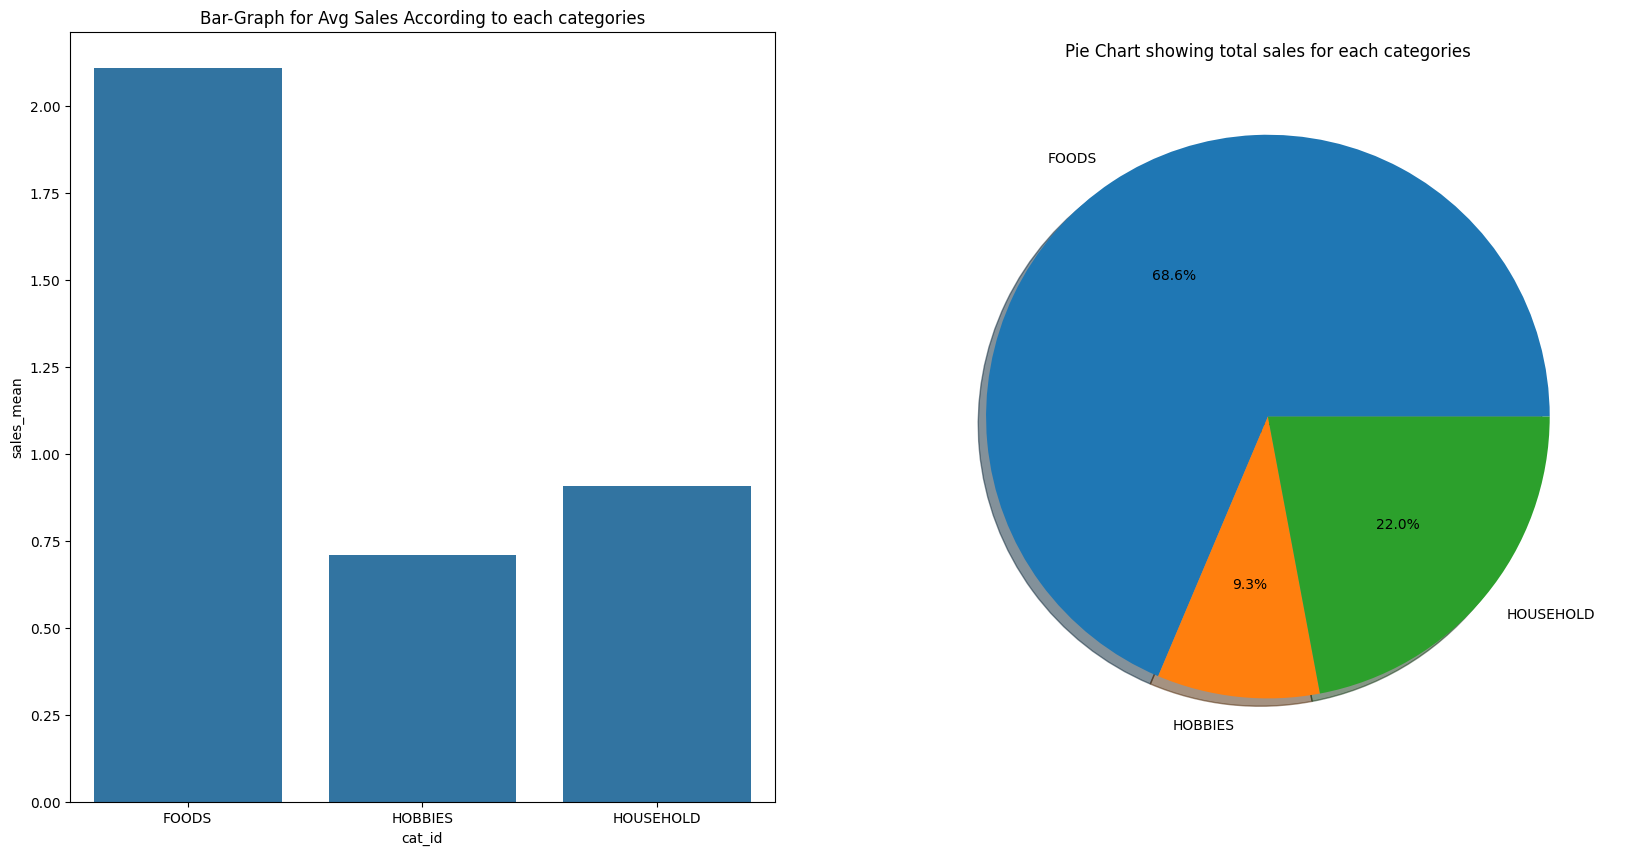

In [29]:
# First, create an aggregated dataframe to avoid repeated groupby operations
df_agg = data.groupby('cat_id').agg({
    'sales': ['mean', 'sum']
}).reset_index()
df_agg.columns = ['cat_id', 'sales_mean', 'sales_sum']

# Calculate percentage
df_agg['perc'] = df_agg['sales_sum'] / df_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

# Bar plot
plt.subplot(121)
sns.barplot(x='cat_id', y='sales_mean', data=df_agg)
plt.title("Bar-Graph for Avg Sales According to each categories")

# Pie chart
plt.subplot(122)
plt.pie(df_agg['perc'].values, labels=df_agg['cat_id'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each categories")

plt.show()

We can clearly see for these graphics above that average and total sales of FOODS are maximum. Let's now create a bar graph for average sales for each State provided, and a pie chart showing the percentage of sales for each State.

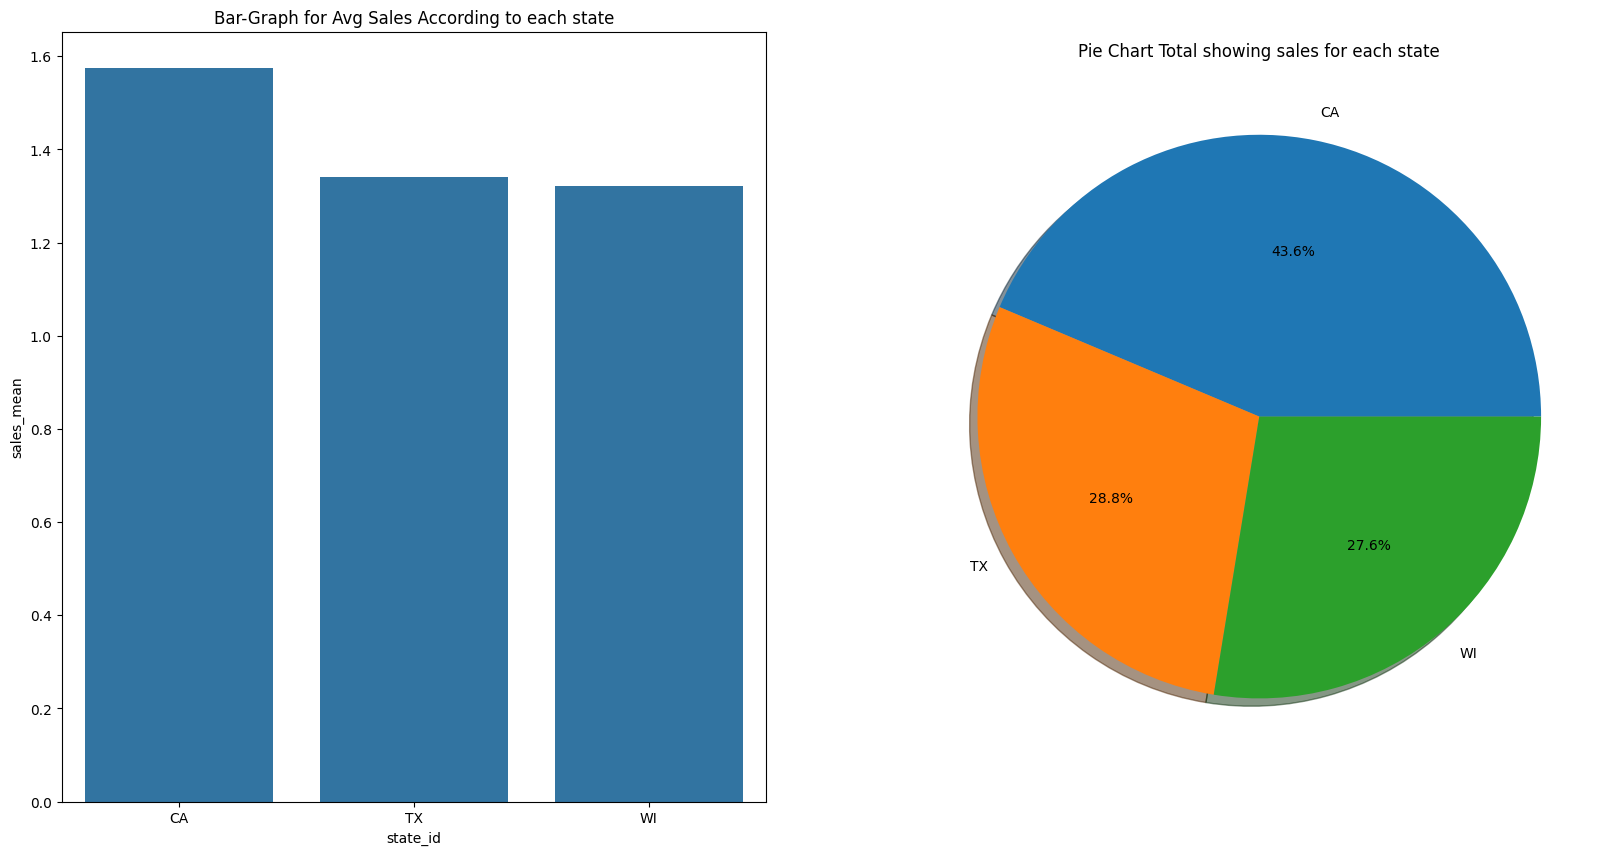

In [30]:
# Aggregate once for state_id and plot
state_agg = data.groupby('state_id').agg({'sales': ['mean', 'sum']}).reset_index()
state_agg.columns = ['state_id', 'sales_mean', 'sales_sum']
state_agg['perc'] = state_agg['sales_sum'] / state_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(x='state_id', y='sales_mean', data=state_agg)
plt.title("Bar-Graph for Avg Sales According to each state")

plt.subplot(122)
plt.pie(state_agg['perc'].values, labels=state_agg['state_id'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart Total showing sales for each state")
plt.show()

Here we see that the highest average and total sales are in California. Now let's find out the sales and an percentage for each store provided in the dataset.

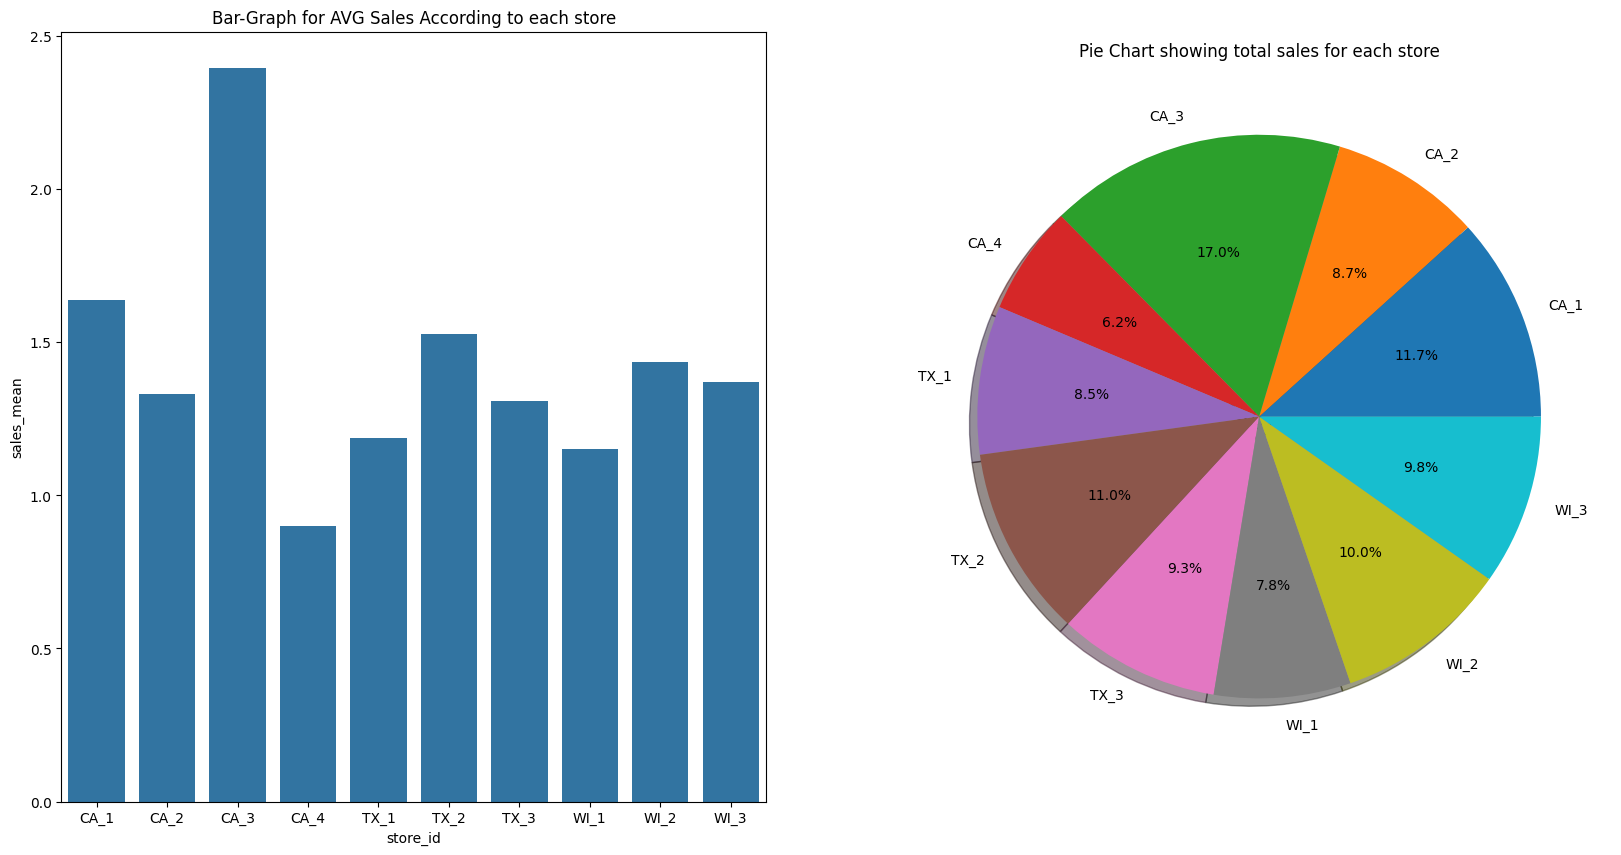

In [31]:
# Aggregate once for store_id and plot
store_agg = data.groupby('store_id').agg({'sales': ['mean', 'sum']}).reset_index()
store_agg.columns = ['store_id', 'sales_mean', 'sales_sum']
store_agg['perc'] = store_agg['sales_sum'] / store_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(x='store_id', y='sales_mean', data=store_agg)
plt.title("Bar-Graph for AVG Sales According to each store")

plt.subplot(122)
plt.pie(store_agg['perc'].values, labels=store_agg['store_id'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each store")

plt.show()

The store CA_3 has the maximum total sales and an average. Our next step will be a generation of a bar graph that shows average sales according to each department and a pie chart that shows a percentage of sales for each department. 

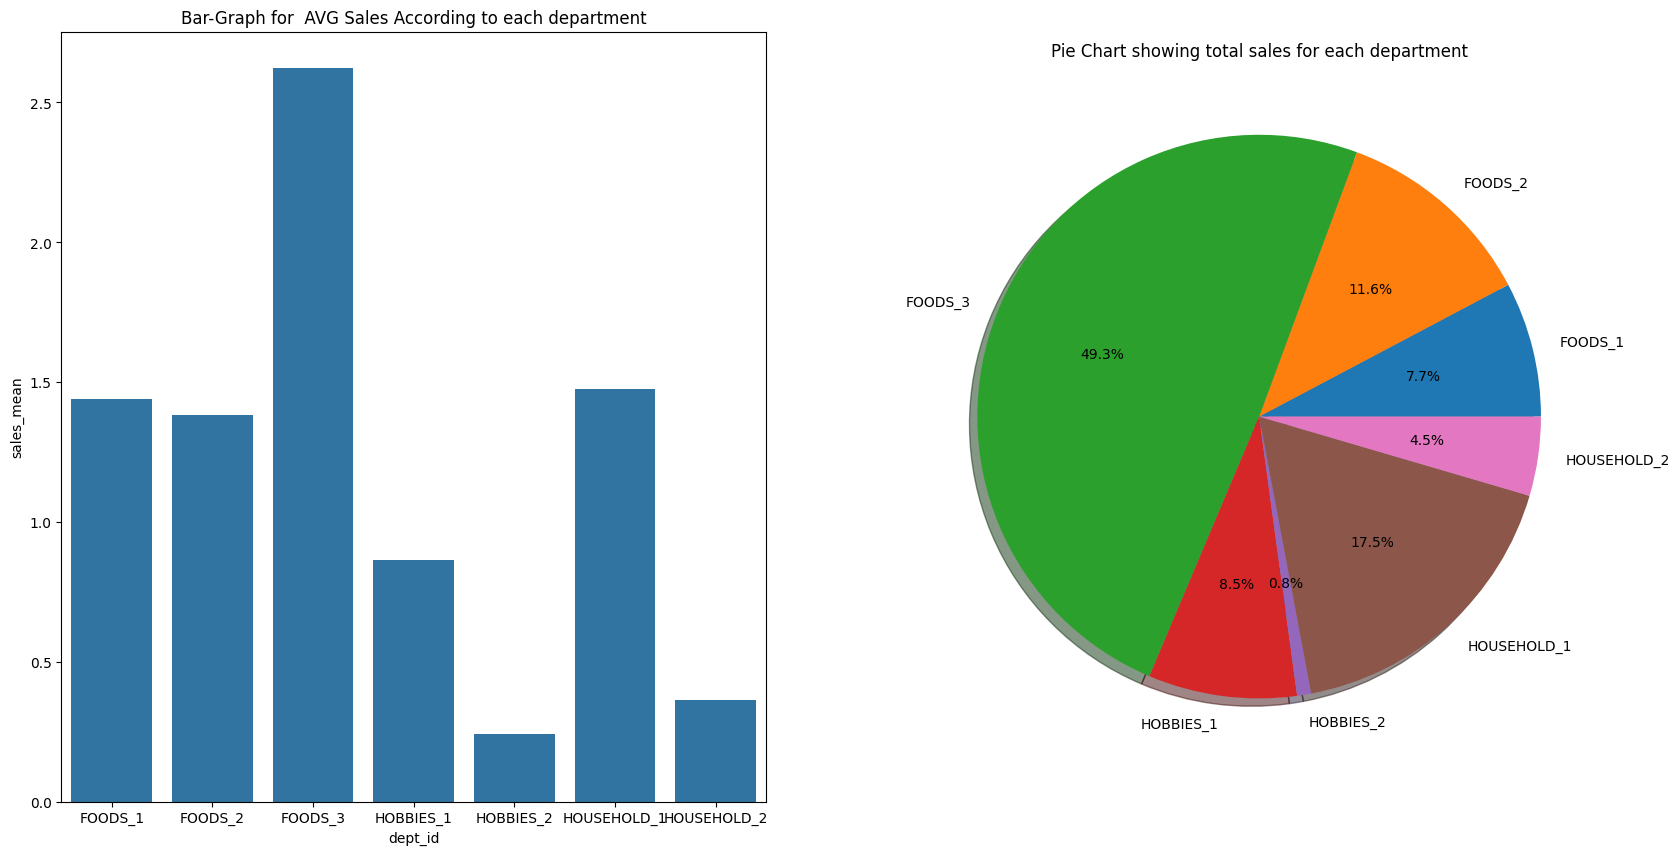

In [32]:
# Aggregate once for dept_id and plot
dept_agg = data.groupby('dept_id').agg({'sales': ['mean', 'sum']}).reset_index()
dept_agg.columns = ['dept_id', 'sales_mean', 'sales_sum']
dept_agg['perc'] = dept_agg['sales_sum'] / dept_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(x='dept_id', y='sales_mean', data=dept_agg)
plt.title("Bar-Graph for  AVG Sales According to each department")

plt.subplot(122)
plt.pie(dept_agg['perc'].values, labels=dept_agg['dept_id'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each department")

plt.show()

FOODS_3 is the department that have the most sales, and HOBBIES_2 is the department that have the least sales. Nearly a half of the sales are done by FOODS_3 department. Let's find out the average sales and a percentage of sales for each week.

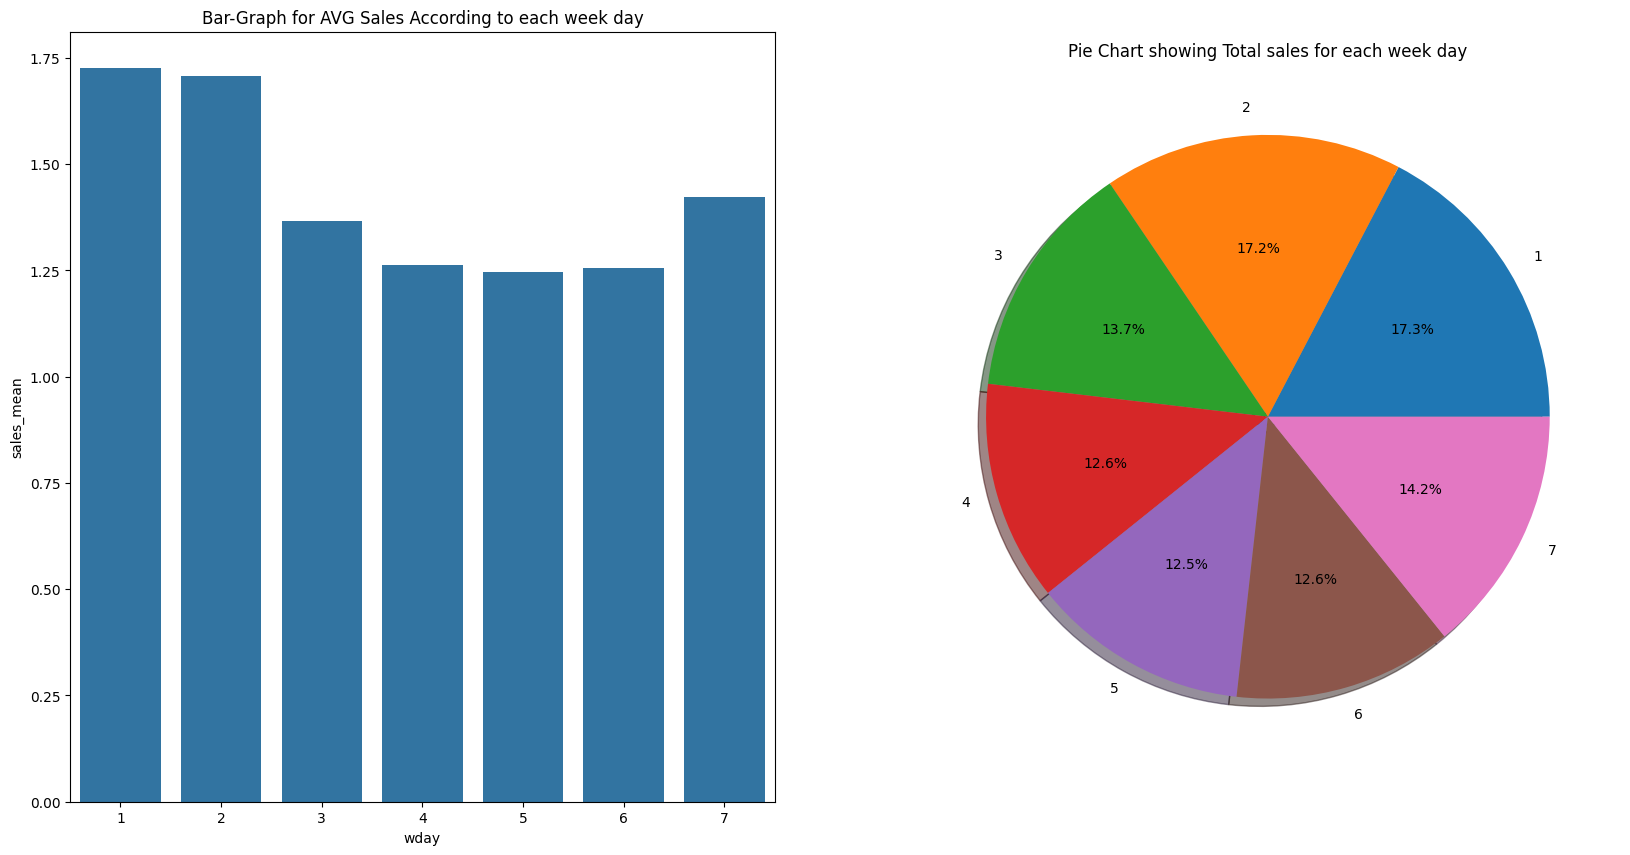

In [33]:
# Aggregate once for wday and plot
wday_agg = data.groupby('wday').agg({'sales': ['mean', 'sum']}).reset_index()
wday_agg.columns = ['wday', 'sales_mean', 'sales_sum']
wday_agg['perc'] = wday_agg['sales_sum'] / wday_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(x='wday', y='sales_mean', data=wday_agg)
plt.title("Bar-Graph for AVG Sales According to each week day")

plt.subplot(122)
plt.pie(wday_agg['perc'].values, labels=wday_agg['wday'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each week day")

plt.show()

Based on the information provided, it's important for trying out to use this weekday feature while training our future models. Now let's check how does it look monthly.

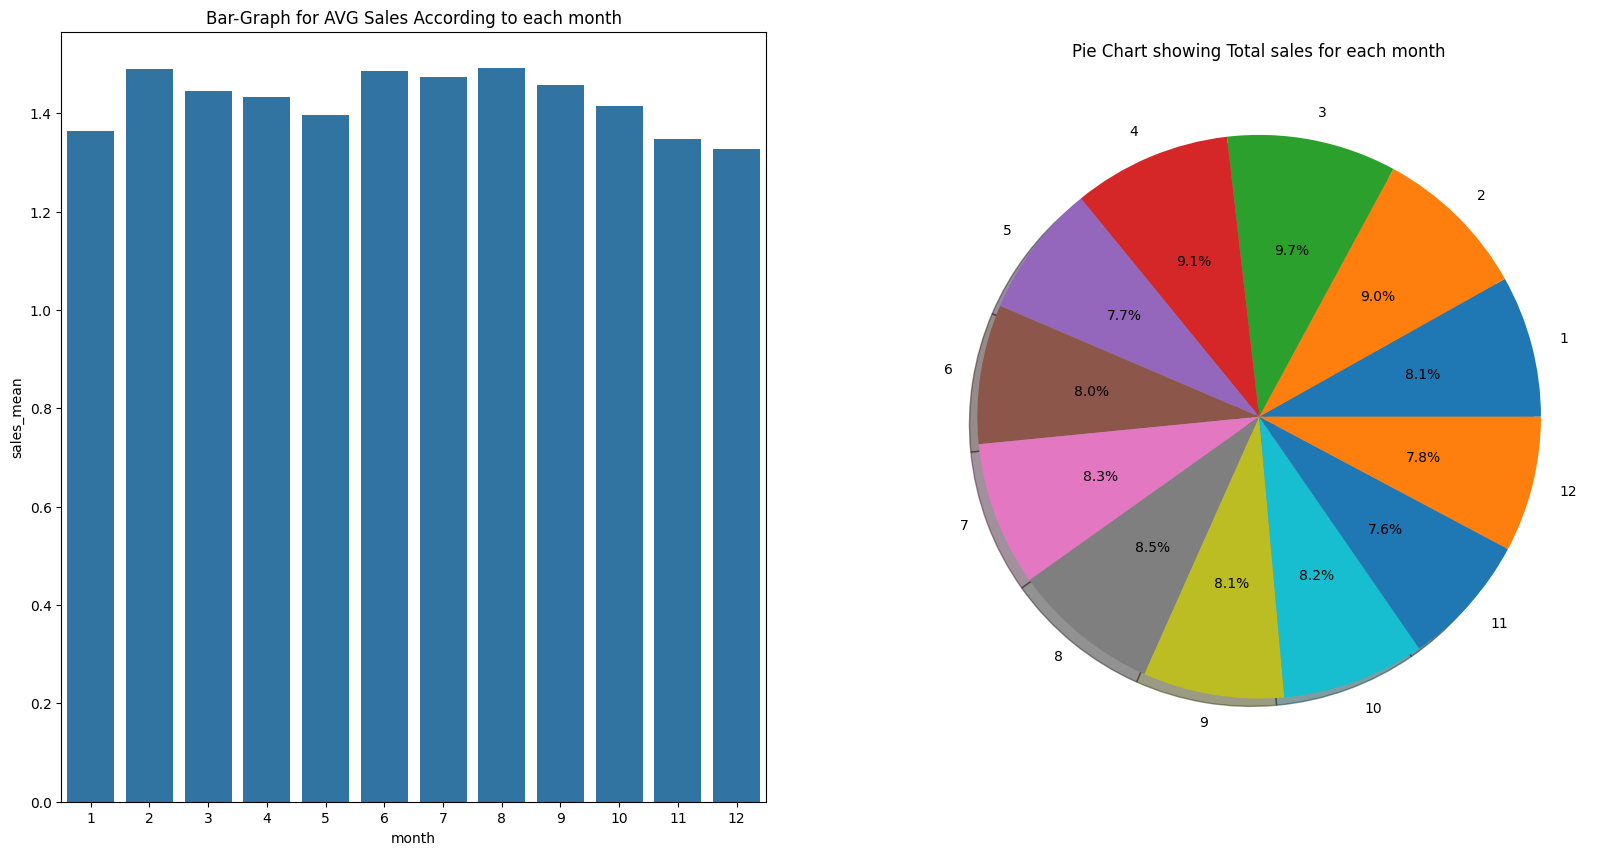

In [34]:
# Aggregate once for month and plot
month_agg = data.groupby('month').agg({'sales': ['mean', 'sum']}).reset_index()
month_agg.columns = ['month', 'sales_mean', 'sales_sum']
month_agg['perc'] = month_agg['sales_sum'] / month_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(x='month', y='sales_mean', data=month_agg)
plt.title("Bar-Graph for AVG Sales According to each month")

plt.subplot(122)
plt.pie(month_agg['perc'].values, labels=month_agg['month'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each month")

plt.show()

The average sales are the highest for February. The only time range that remains to check is a year.

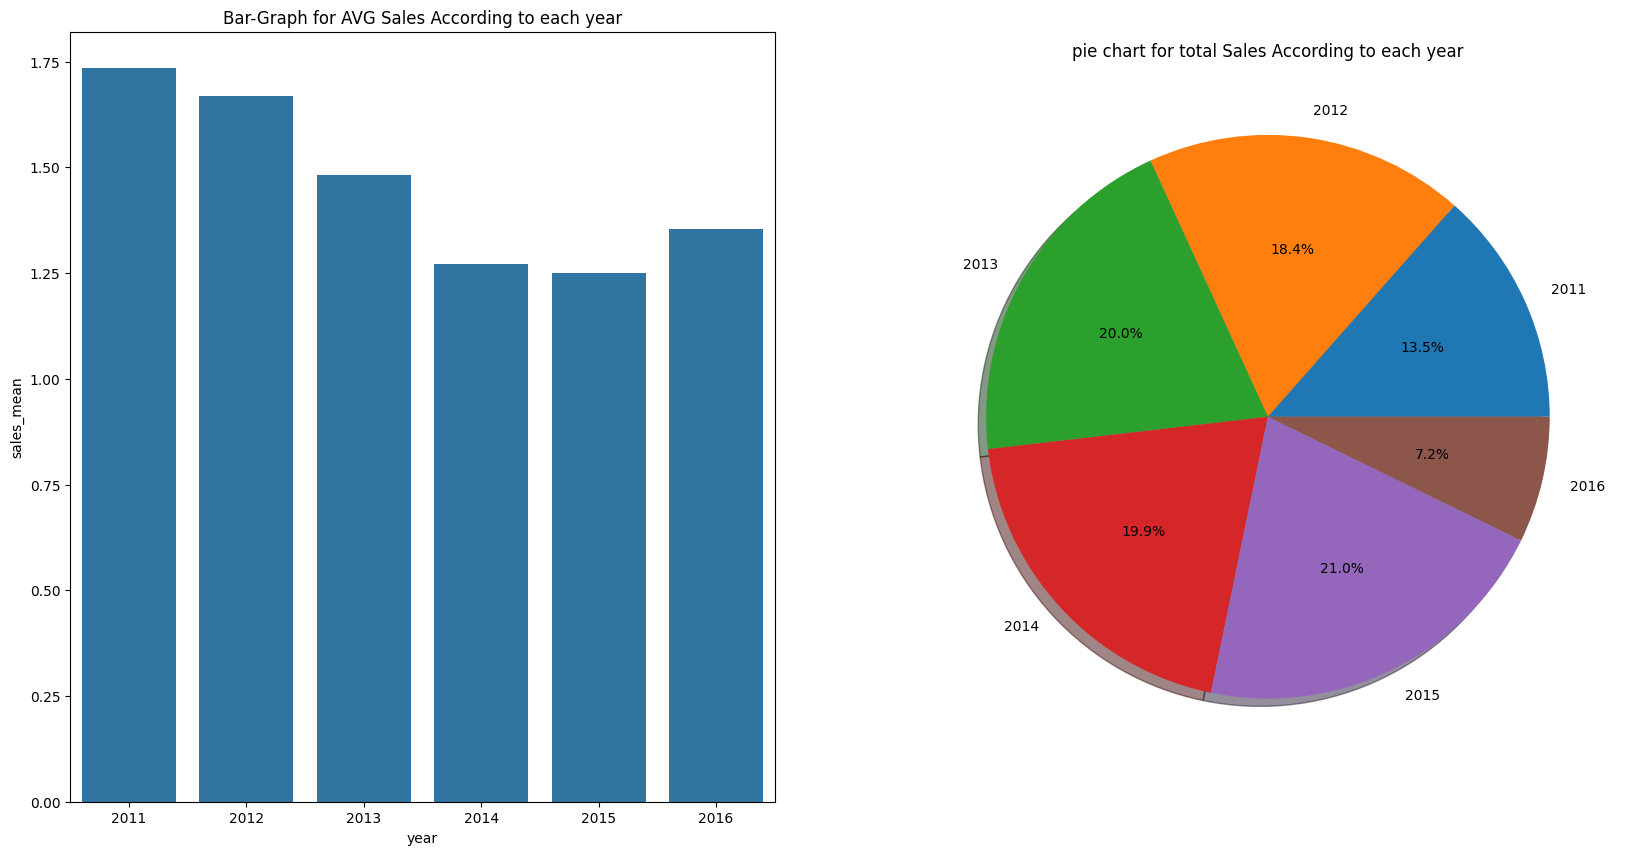

In [35]:
# Aggregate once for year and plot
year_agg = data.groupby('year').agg({'sales': ['mean', 'sum']}).reset_index()
year_agg.columns = ['year', 'sales_mean', 'sales_sum']
year_agg['perc'] = year_agg['sales_sum'] / year_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(x='year', y='sales_mean', data=year_agg)
plt.title("Bar-Graph for AVG Sales According to each year")

plt.subplot(122)
plt.pie(year_agg['perc'].values, labels=year_agg['year'].values, shadow=True, autopct='%1.1f%%')
plt.title("pie chart for total Sales According to each year")

plt.show()

We have the highest average sales in 2011, and the lowest in 2015 even if the total sales are the biggest in 2015. Now let's analyze how SNAP (Supplemental Nutrition Assistance Program) in California affects sales

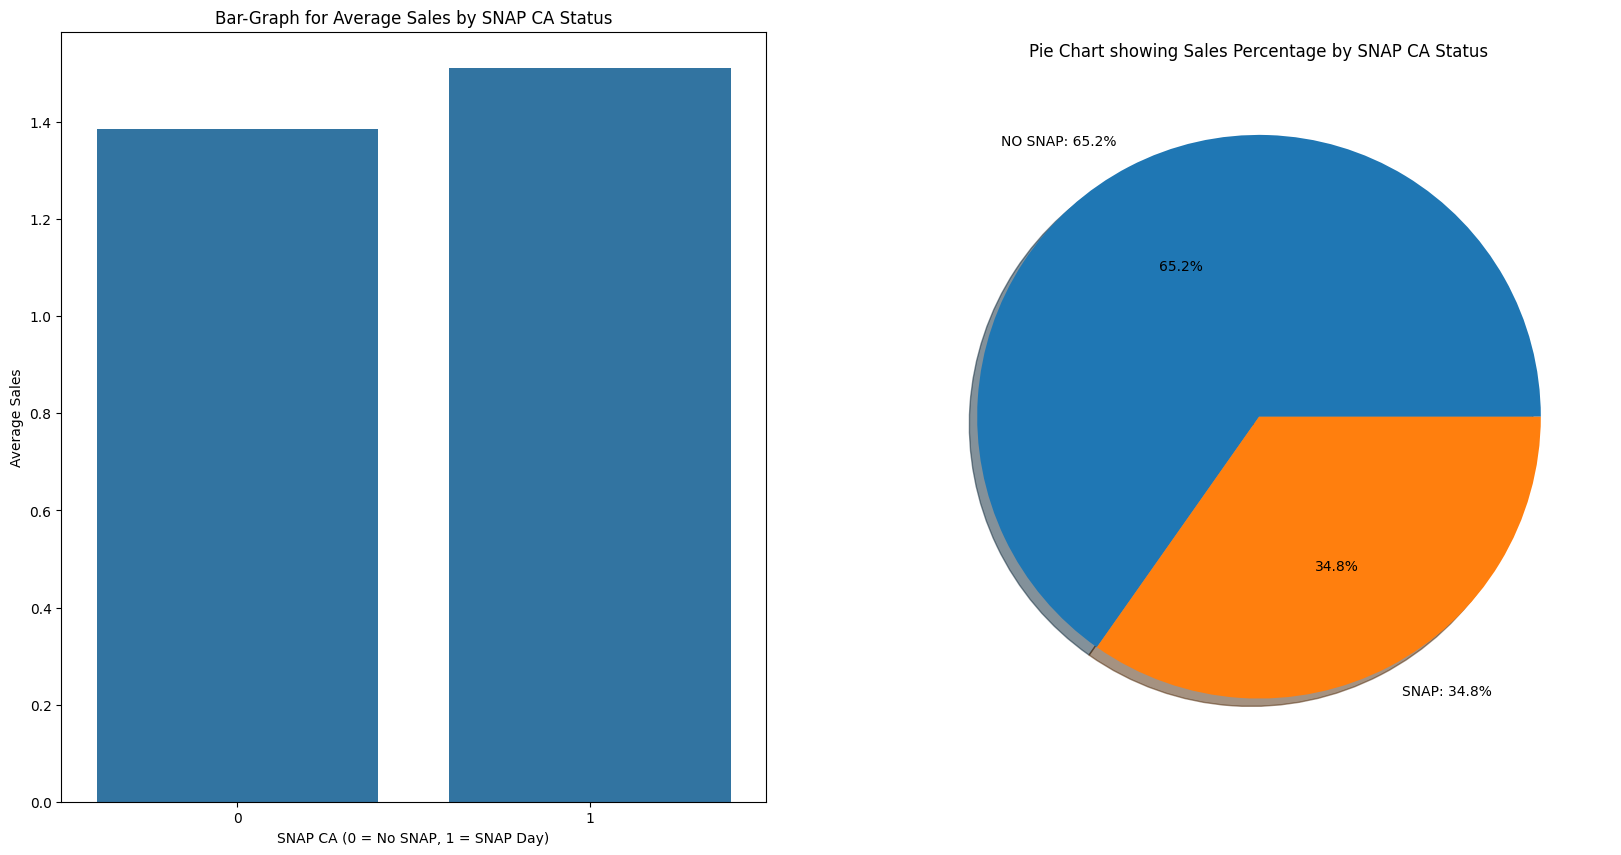

In [38]:
# Aggregate once for snap_ca and plot
snap_ca_agg = data.groupby('snap_CA').agg({'sales': ['mean', 'sum']}).reset_index()
snap_ca_agg.columns = ['snap_CA', 'sales_mean', 'sales_sum']
snap_ca_agg['perc'] = snap_ca_agg['sales_sum'] / snap_ca_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

# Bar plot for average sales
plt.subplot(121)
sns.barplot(x='snap_CA', y='sales_mean', data=snap_ca_agg)
plt.title("Bar-Graph for Average Sales by SNAP CA Status")
plt.xlabel("SNAP CA (0 = No SNAP, 1 = SNAP Day)")
plt.ylabel("Average Sales")

# Pie chart for sales percentage
plt.subplot(122)
plt.pie(snap_ca_agg['perc'].values, 
        labels=[f'NO SNAP: {snap_ca_agg["perc"].values[0]:.1f}%' if i == 0 else f'SNAP: {snap_ca_agg["perc"].values[1]:.1f}%' for i in snap_ca_agg['snap_CA'].values], 
        shadow=True, 
        autopct='%1.1f%%')
plt.title("Pie Chart showing Sales Percentage by SNAP CA Status")

plt.show()

From that we can analyze that there are more average sales with SNAP rather than without it. Now let's analyze how SNAP (Supplemental Nutrition Assistance Program) in Texas affects sales

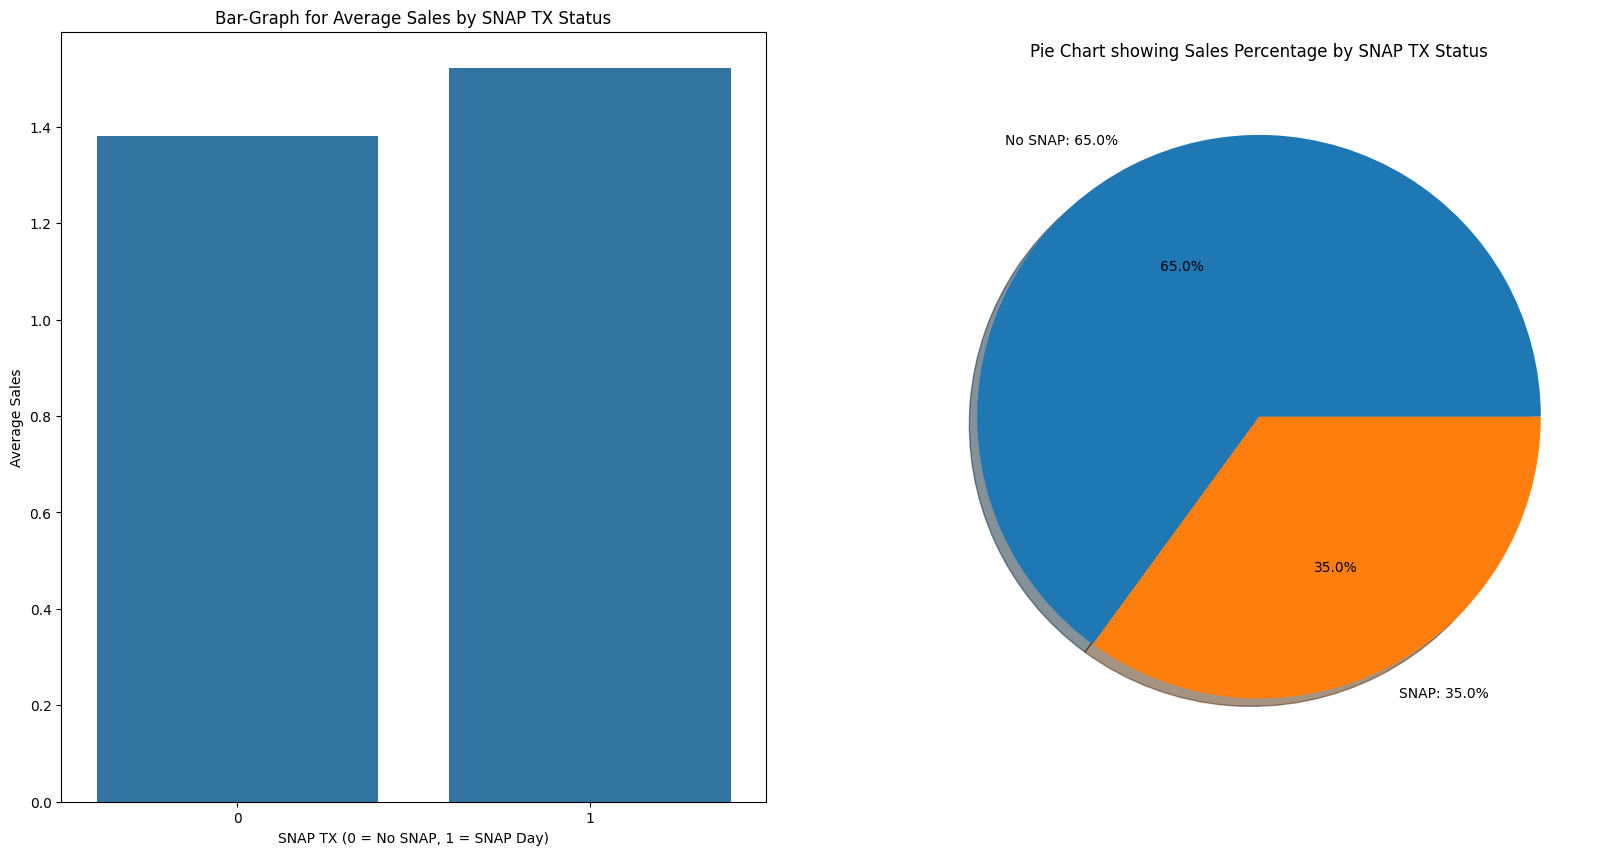

In [39]:
# Aggregate once for snap_tx and plot
snap_tx_agg = data.groupby('snap_TX').agg({'sales': ['mean', 'sum']}).reset_index()
snap_tx_agg.columns = ['snap_TX', 'sales_mean', 'sales_sum']
snap_tx_agg['perc'] = snap_tx_agg['sales_sum'] / snap_tx_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

# Bar plot for average sales
plt.subplot(121)
sns.barplot(x='snap_TX', y='sales_mean', data=snap_tx_agg)
plt.title("Bar-Graph for Average Sales by SNAP TX Status")
plt.xlabel("SNAP TX (0 = No SNAP, 1 = SNAP Day)")
plt.ylabel("Average Sales")

# Pie chart for sales percentage
plt.subplot(122)
plt.pie(snap_tx_agg['perc'].values, 
        labels=[f'No SNAP: {snap_tx_agg["perc"].values[0]:.1f}%' if i == 0 else f'SNAP: {snap_tx_agg["perc"].values[1]:.1f}%' for i in snap_tx_agg['snap_TX'].values], 
        shadow=True, 
        autopct='%1.1f%%')
plt.title("Pie Chart showing Sales Percentage by SNAP TX Status")

plt.show()

It's similar to what we see in California. Last, but not least, let's analyze how SNAP (Supplemental Nutrition Assistance Program) in Texas affects sales

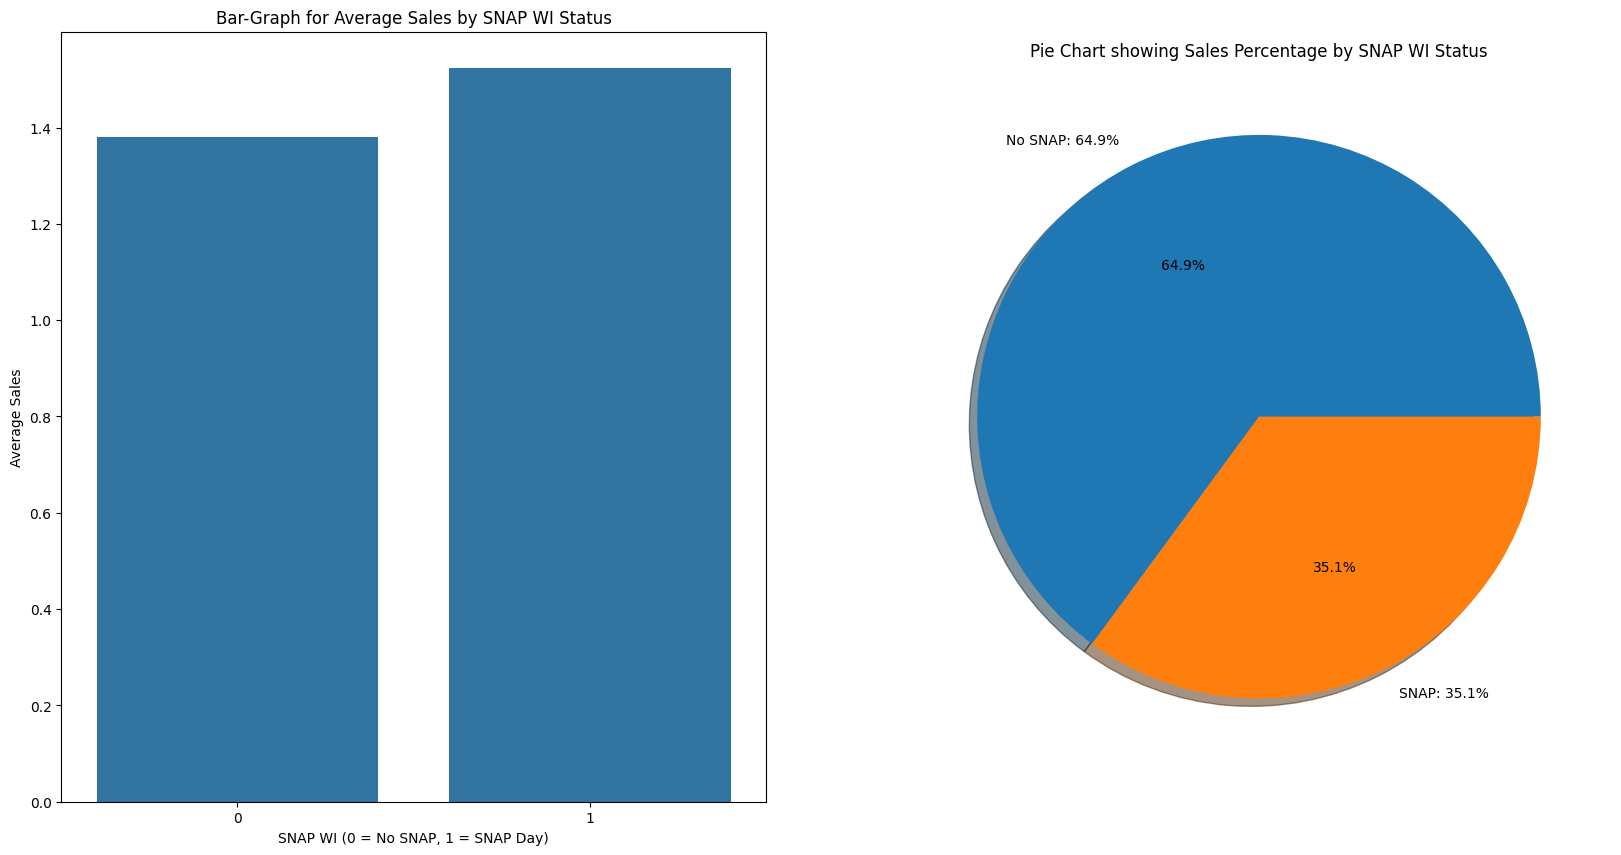

In [40]:
# Aggregate once for snap_wi and plot
snap_wi_agg = data.groupby('snap_WI').agg({'sales': ['mean', 'sum']}).reset_index()
snap_wi_agg.columns = ['snap_WI', 'sales_mean', 'sales_sum']
snap_wi_agg['perc'] = snap_wi_agg['sales_sum'] / snap_wi_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

# Bar plot for average sales
plt.subplot(121)
sns.barplot(x='snap_WI', y='sales_mean', data=snap_wi_agg)
plt.title("Bar-Graph for Average Sales by SNAP WI Status")
plt.xlabel("SNAP WI (0 = No SNAP, 1 = SNAP Day)")
plt.ylabel("Average Sales")

# Pie chart for sales percentage
plt.subplot(122)
plt.pie(snap_wi_agg['perc'].values, 
        labels=[f'No SNAP: {snap_wi_agg["perc"].values[0]:.1f}%' if i == 0 else f'SNAP: {snap_wi_agg["perc"].values[1]:.1f}%' for i in snap_wi_agg['snap_WI'].values], 
        shadow=True, 
        autopct='%1.1f%%')
plt.title("Pie Chart showing Sales Percentage by SNAP WI Status")

plt.show()

Generally speaking, all 3 states have similar results when it comes to SNAP average sales and the amount of sales. How is it going to look like according to 2 event types?

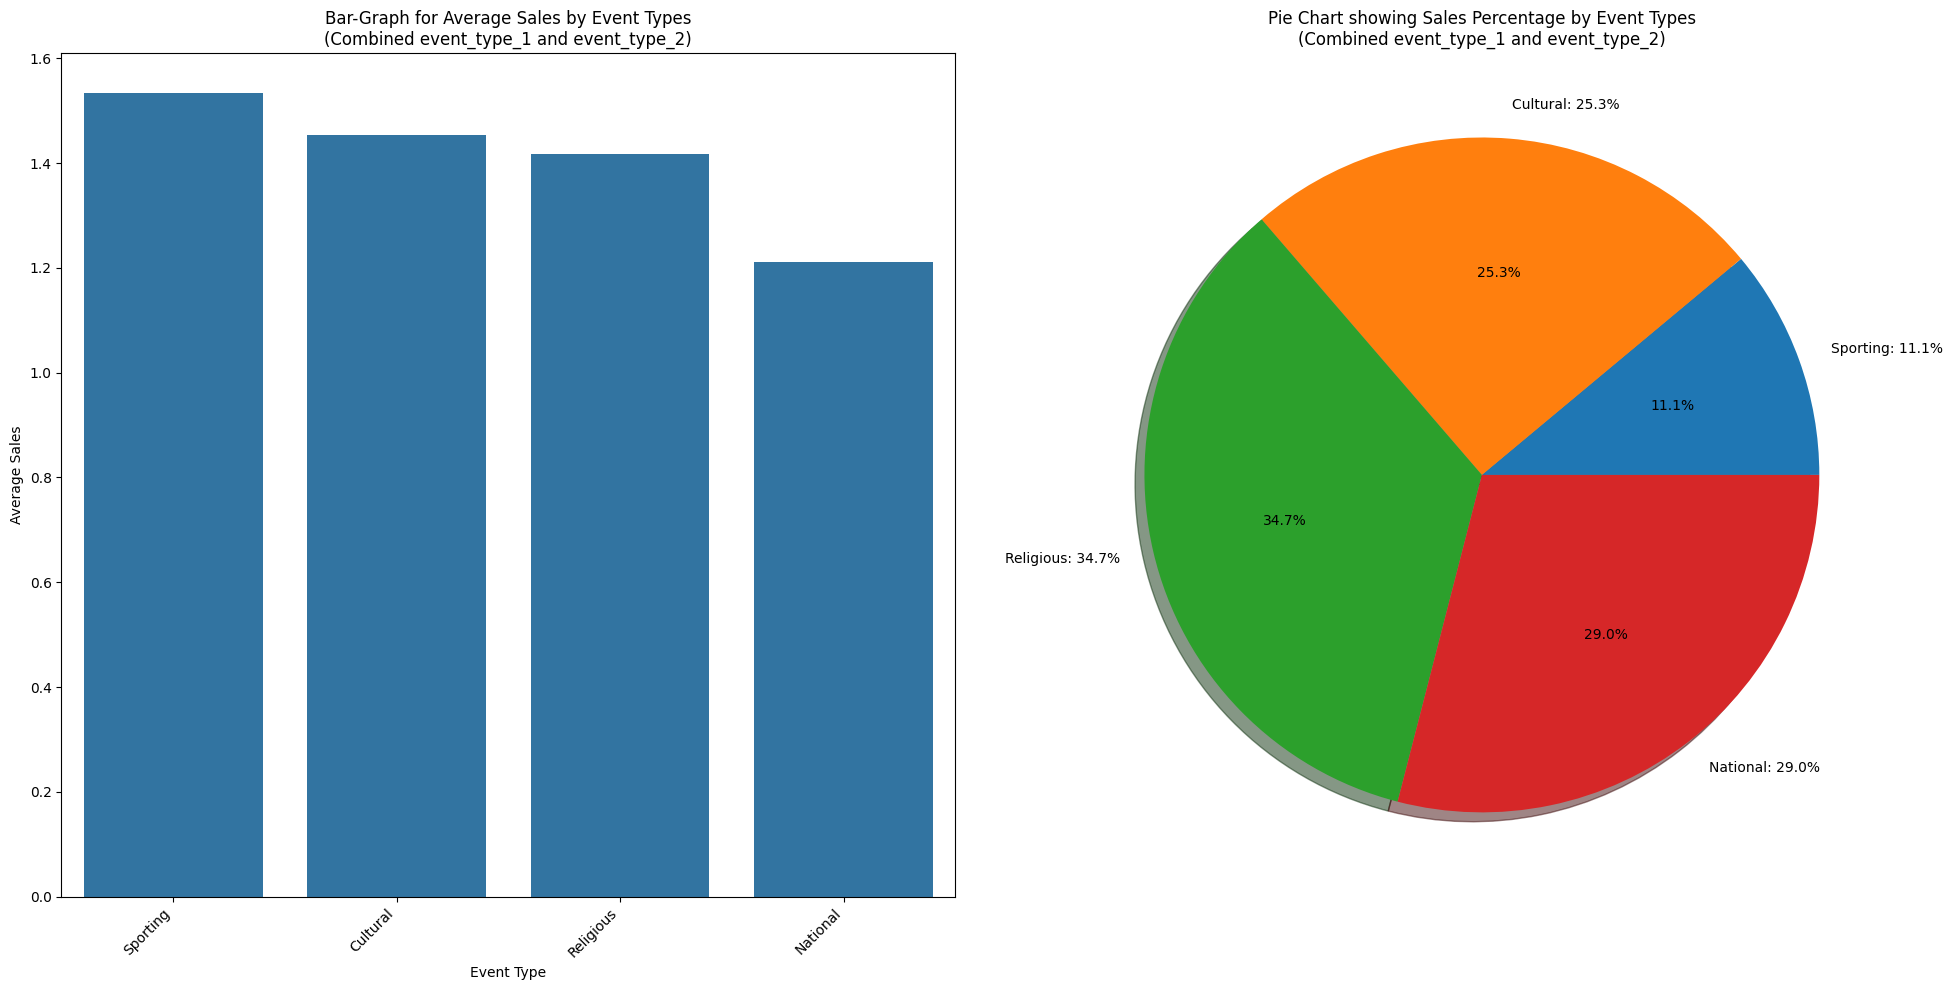


Top 5 Event Types by Average Sales:
event_type  sales_mean
  Sporting    1.533161
  Cultural    1.453021
 Religious    1.417523
  National    1.210402


In [43]:
# Combine both event types into a single analysis
# First, get all events (both type 1 and 2) and their sales
events_df = pd.concat([
    data[['event_type_1', 'sales']].rename(columns={'event_type_1': 'event_type'}),
    data[['event_type_2', 'sales']].rename(columns={'event_type_2': 'event_type'})
])

# Aggregate the combined events data
events_agg = events_df.groupby('event_type').agg({
    'sales': ['mean', 'sum']
}).reset_index()
events_agg.columns = ['event_type', 'sales_mean', 'sales_sum']
events_agg['perc'] = events_agg['sales_sum'] / events_agg['sales_sum'].sum() * 100

# Sort by average sales for better visualization
events_agg = events_agg.sort_values('sales_mean', ascending=False)

plt.figure(figsize=(20,10))

# Bar plot for average sales by all event types
plt.subplot(121)
sns.barplot(x='event_type', y='sales_mean', data=events_agg)
plt.title("Bar-Graph for Average Sales by Event Types\n(Combined event_type_1 and event_type_2)")
plt.xlabel("Event Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=45, ha='right')

# Pie chart for sales percentage by all event types
plt.subplot(122)
plt.pie(events_agg['perc'].values, 
        labels=[f'{evt}: {perc:.1f}%' for evt, perc in zip(events_agg['event_type'], events_agg['perc'])],
        shadow=True, 
        autopct='%1.1f%%')
plt.title("Pie Chart showing Sales Percentage by Event Types\n(Combined event_type_1 and event_type_2)")

plt.tight_layout()
plt.show()

# Display the top 5 event types by average sales
print("\nTop 5 Event Types by Average Sales:")
print(events_agg[['event_type', 'sales_mean']].head().to_string(index=False))

Average sales by event are the biggest where there is a sporting event going on. But sales percentage is the biggest one when it comes to religious events.

FROM ALL THE ANALYSIS WE MADE, IT CAN BE SEEN THAT BOTH TEST AND TRAIN DATA HAVE THE SAME DISTRIBUTION. LET'S TAKE LAST 30 DAYS SALES ACCORDING TO STORES FOR VARIOUS PRODUCTS

Here are the sales of last 30 days for item FOODS_3_827 in all stores located in Wisconsin

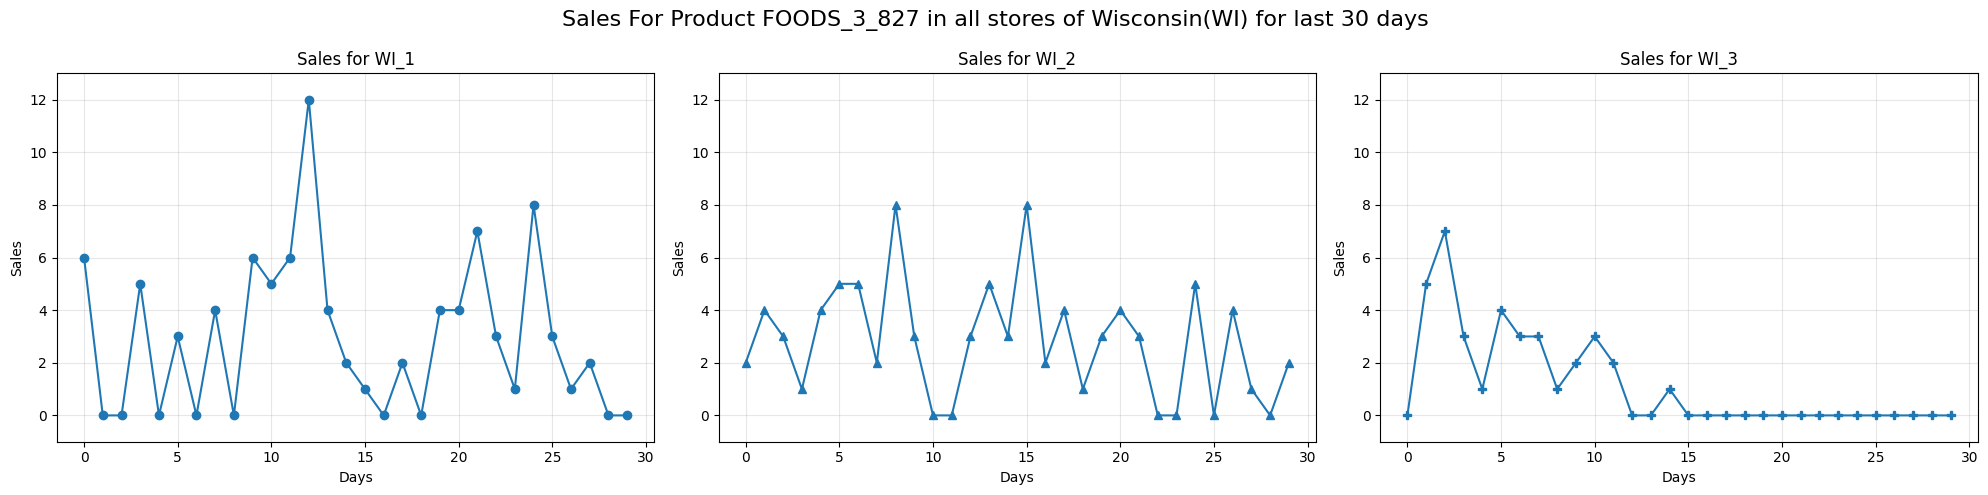


Summary Statistics for last 30 days:

WI_1:
Average Sales: 2.97
Max Sales: 12.00
Min Sales: 0.00

WI_2:
Average Sales: 2.83
Max Sales: 8.00
Min Sales: 0.00

WI_3:
Average Sales: 1.17
Max Sales: 7.00
Min Sales: 0.00


In [45]:
# Filter and sort data for each Wisconsin store
df1 = data[(data['item_id']=='FOODS_3_827') & (data['store_id']=='WI_1')].sort_values(by='date')
df2 = data[(data['item_id']=='FOODS_3_827') & (data['store_id']=='WI_2')].sort_values(by='date')
df3 = data[(data['item_id']=='FOODS_3_827') & (data['store_id']=='WI_3')].sort_values(by='date')

# Get the y-axis limits for consistent scale
max_sales = max(
    df1['sales'].values[-30:].max(),
    df2['sales'].values[-30:].max(),
    df3['sales'].values[-30:].max()
)
min_sales = min(
    df1['sales'].values[-30:].min(),
    df2['sales'].values[-30:].min(),
    df3['sales'].values[-30:].min()
)

plt.figure(figsize=(20,5))

# Plot for WI_1
plt.subplot(131)
plt.plot(range(30), df1['sales'].values[-30:], marker="o", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for WI_1")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for WI_2
plt.subplot(132)
plt.plot(range(30), df2['sales'].values[-30:], marker="^", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for WI_2")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for WI_3
plt.subplot(133)
plt.plot(range(30), df3['sales'].values[-30:], marker="P", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for WI_3")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

plt.suptitle("Sales For Product FOODS_3_827 in all stores of Wisconsin(WI) for last 30 days", fontsize=16)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for last 30 days:")
print("\nWI_1:")
print(f"Average Sales: {df1['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df1['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df1['sales'].values[-30:].min():.2f}")

print("\nWI_2:")
print(f"Average Sales: {df2['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df2['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df2['sales'].values[-30:].min():.2f}")

print("\nWI_3:")
print(f"Average Sales: {df3['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df3['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df3['sales'].values[-30:].min():.2f}")

Sales of last 30 days for all stores of California for item HOBBIES_1_008

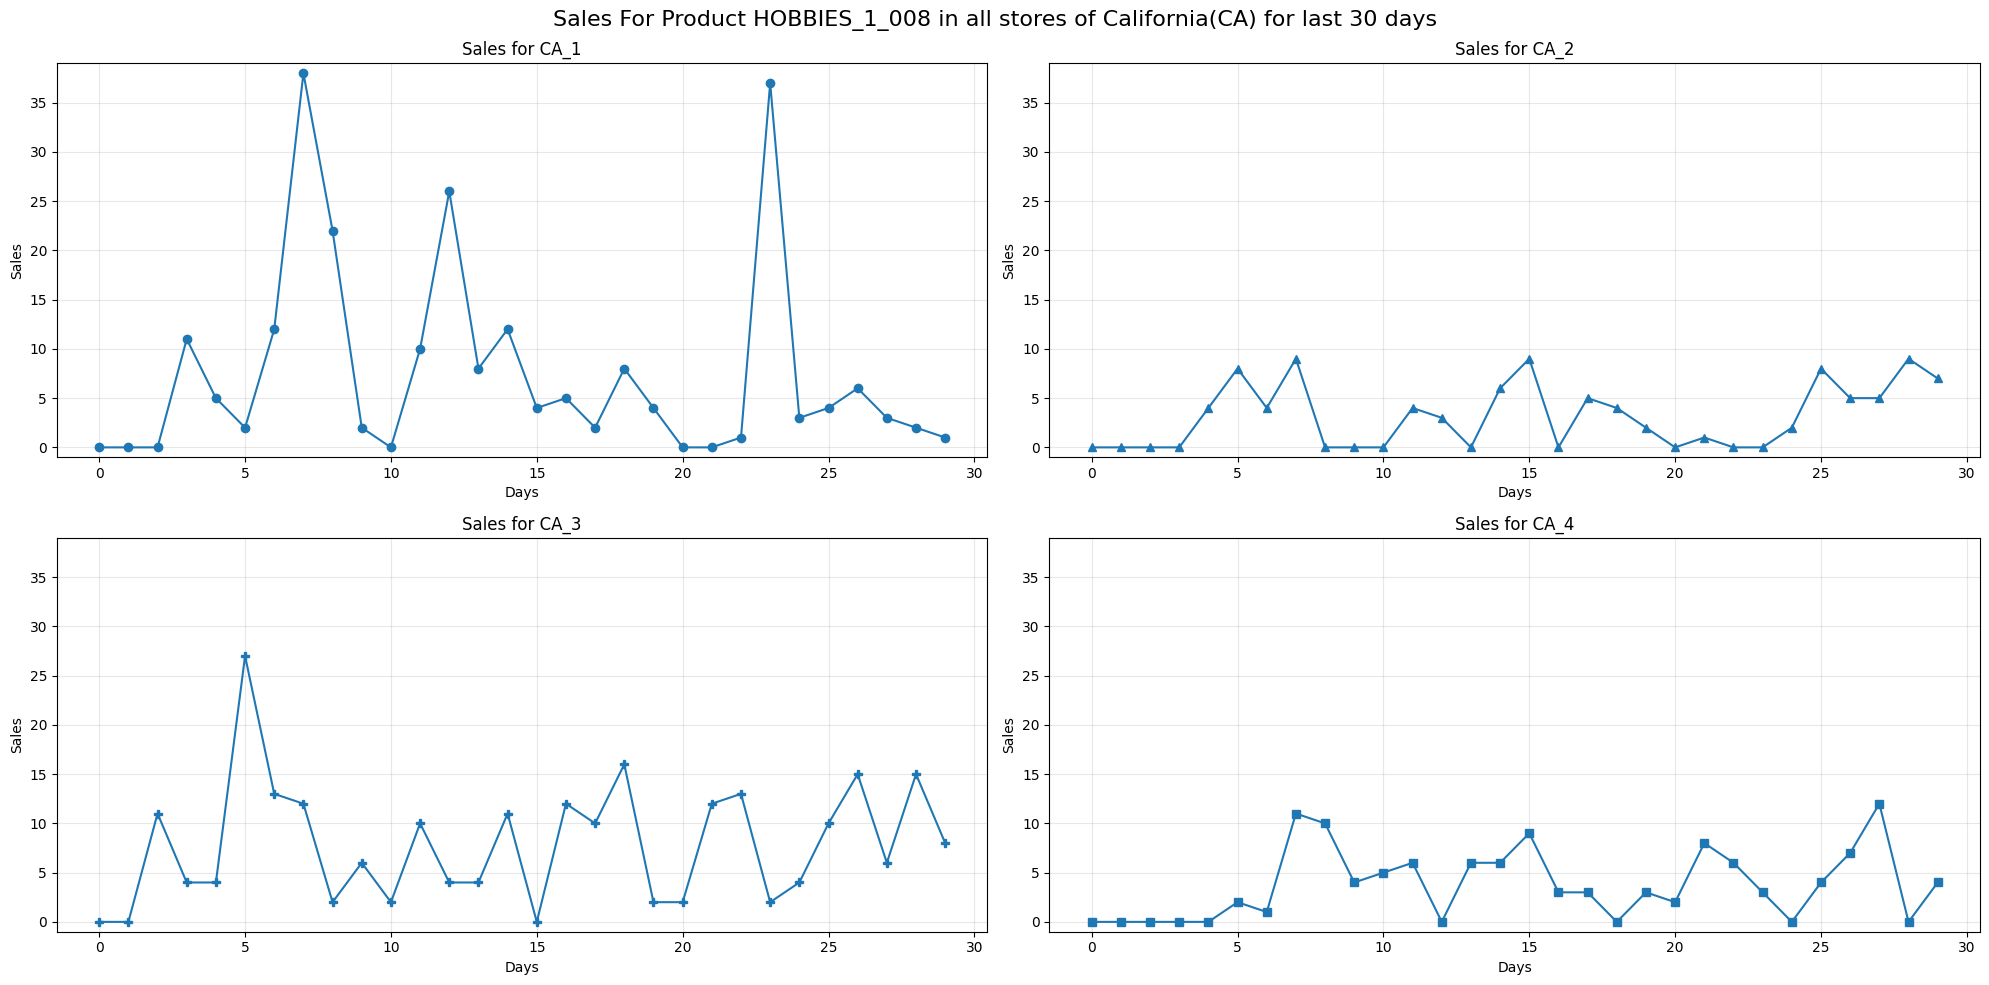


Summary Statistics for last 30 days:

CA_1:
Average Sales: 7.60
Max Sales: 38.00
Min Sales: 0.00

CA_2:
Average Sales: 3.17
Max Sales: 9.00
Min Sales: 0.00

CA_3:
Average Sales: 7.90
Max Sales: 27.00
Min Sales: 0.00

CA_4:
Average Sales: 3.83
Max Sales: 12.00
Min Sales: 0.00


In [48]:
# Filter and sort data for each California store
df1_ca = data[(data['item_id']=='HOBBIES_1_008') & (data['store_id']=='CA_1')].sort_values(by='date')
df2_ca = data[(data['item_id']=='HOBBIES_1_008') & (data['store_id']=='CA_2')].sort_values(by='date')
df3_ca = data[(data['item_id']=='HOBBIES_1_008') & (data['store_id']=='CA_3')].sort_values(by='date')
df4_ca = data[(data['item_id']=='HOBBIES_1_008') & (data['store_id']=='CA_4')].sort_values(by='date')

# Get the y-axis limits for consistent scale
max_sales = max(
    df1_ca['sales'].values[-30:].max(),
    df2_ca['sales'].values[-30:].max(),
    df3_ca['sales'].values[-30:].max(),
    df4_ca['sales'].values[-30:].max()
)
min_sales = min(
    df1_ca['sales'].values[-30:].min(),
    df2_ca['sales'].values[-30:].min(),
    df3_ca['sales'].values[-30:].min(),
    df4_ca['sales'].values[-30:].min()
)

plt.figure(figsize=(20,10))

# Plot for CA_1
plt.subplot(221)
plt.plot(range(30), df1_ca['sales'].values[-30:], marker="o", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_1")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for CA_2
plt.subplot(222)
plt.plot(range(30), df2_ca['sales'].values[-30:], marker="^", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_2")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for CA_3
plt.subplot(223)
plt.plot(range(30), df3_ca['sales'].values[-30:], marker="P", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_3")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for CA_4
plt.subplot(224)
plt.plot(range(30), df4_ca['sales'].values[-30:], marker="s", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_4")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

plt.suptitle("Sales For Product HOBBIES_1_008 in all stores of California(CA) for last 30 days", fontsize=16)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for last 30 days:")
print("\nCA_1:")
print(f"Average Sales: {df1_ca['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df1_ca['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df1_ca['sales'].values[-30:].min():.2f}")

print("\nCA_2:")
print(f"Average Sales: {df2_ca['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df2_ca['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df2_ca['sales'].values[-30:].min():.2f}")

print("\nCA_3:")
print(f"Average Sales: {df3_ca['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df3_ca['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df3_ca['sales'].values[-30:].min():.2f}")

print("\nCA_4:")
print(f"Average Sales: {df4_ca['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df4_ca['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df4_ca['sales'].values[-30:].min():.2f}")

Sales of last 30 days for all stores of Texas for item HOUSEHOLD_1_526

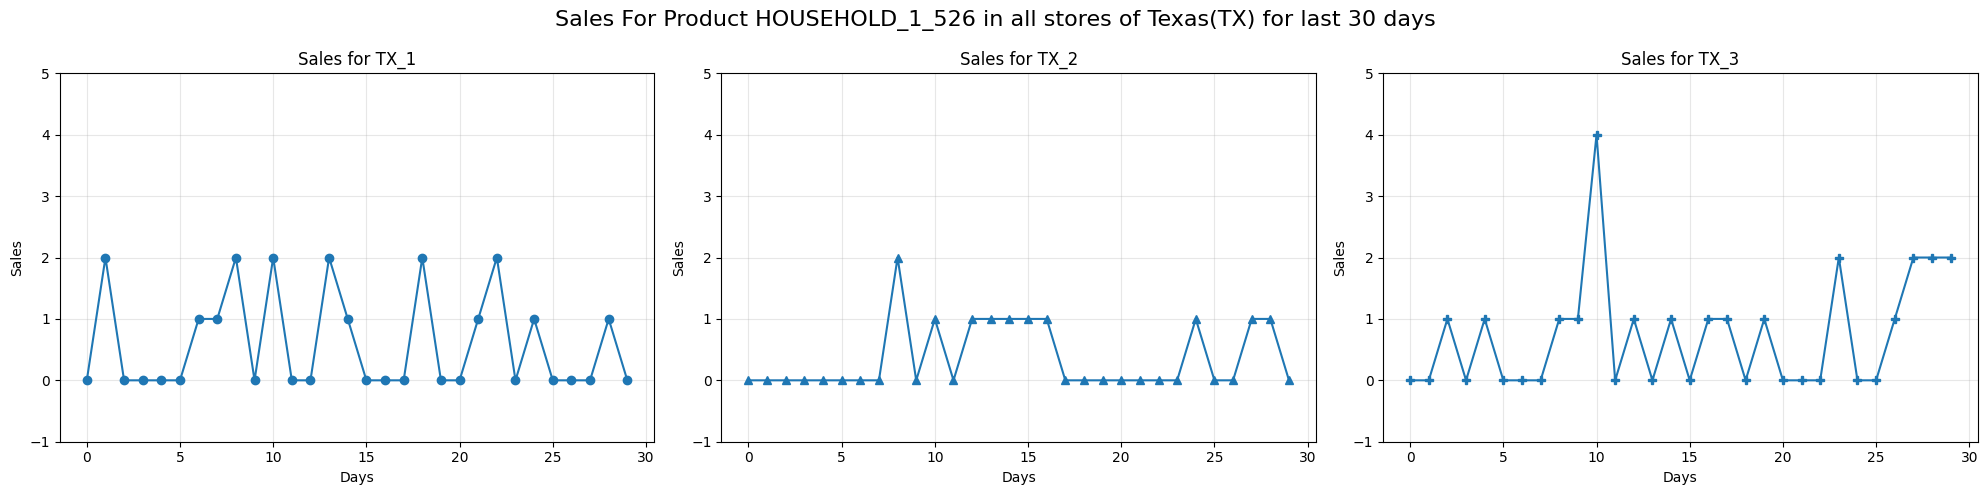


Summary Statistics for last 30 days:

TX_1:
Average Sales: 0.60
Max Sales: 2.00
Min Sales: 0.00

TX_2:
Average Sales: 0.37
Max Sales: 2.00
Min Sales: 0.00

TX_3:
Average Sales: 0.73
Max Sales: 4.00
Min Sales: 0.00


In [49]:
# Filter and sort data for each Texas store
df1_tx = data[(data['item_id']=='HOUSEHOLD_1_526') & (data['store_id']=='TX_1')].sort_values(by='date')
df2_tx = data[(data['item_id']=='HOUSEHOLD_1_526') & (data['store_id']=='TX_2')].sort_values(by='date')
df3_tx = data[(data['item_id']=='HOUSEHOLD_1_526') & (data['store_id']=='TX_3')].sort_values(by='date')

# Get the y-axis limits for consistent scale
max_sales = max(
    df1_tx['sales'].values[-30:].max(),
    df2_tx['sales'].values[-30:].max(),
    df3_tx['sales'].values[-30:].max()
)
min_sales = min(
    df1_tx['sales'].values[-30:].min(),
    df2_tx['sales'].values[-30:].min(),
    df3_tx['sales'].values[-30:].min()
)

plt.figure(figsize=(20,5))

# Plot for TX_1
plt.subplot(131)
plt.plot(range(30), df1_tx['sales'].values[-30:], marker="o", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_1")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for TX_2
plt.subplot(132)
plt.plot(range(30), df2_tx['sales'].values[-30:], marker="^", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_2")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

# Plot for TX_3
plt.subplot(133)
plt.plot(range(30), df3_tx['sales'].values[-30:], marker="P", linestyle='-', label='Daily Sales')
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_3")
plt.grid(True, alpha=0.3)
plt.ylim(min_sales - 1, max_sales + 1)

plt.suptitle("Sales For Product HOUSEHOLD_1_526 in all stores of Texas(TX) for last 30 days", fontsize=16)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for last 30 days:")
print("\nTX_1:")
print(f"Average Sales: {df1_tx['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df1_tx['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df1_tx['sales'].values[-30:].min():.2f}")

print("\nTX_2:")
print(f"Average Sales: {df2_tx['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df2_tx['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df2_tx['sales'].values[-30:].min():.2f}")

print("\nTX_3:")
print(f"Average Sales: {df3_tx['sales'].values[-30:].mean():.2f}")
print(f"Max Sales: {df3_tx['sales'].values[-30:].max():.2f}")
print(f"Min Sales: {df3_tx['sales'].values[-30:].min():.2f}")

SALES ACCORDING TO YEAR AND MONTH FOR EACH STATE

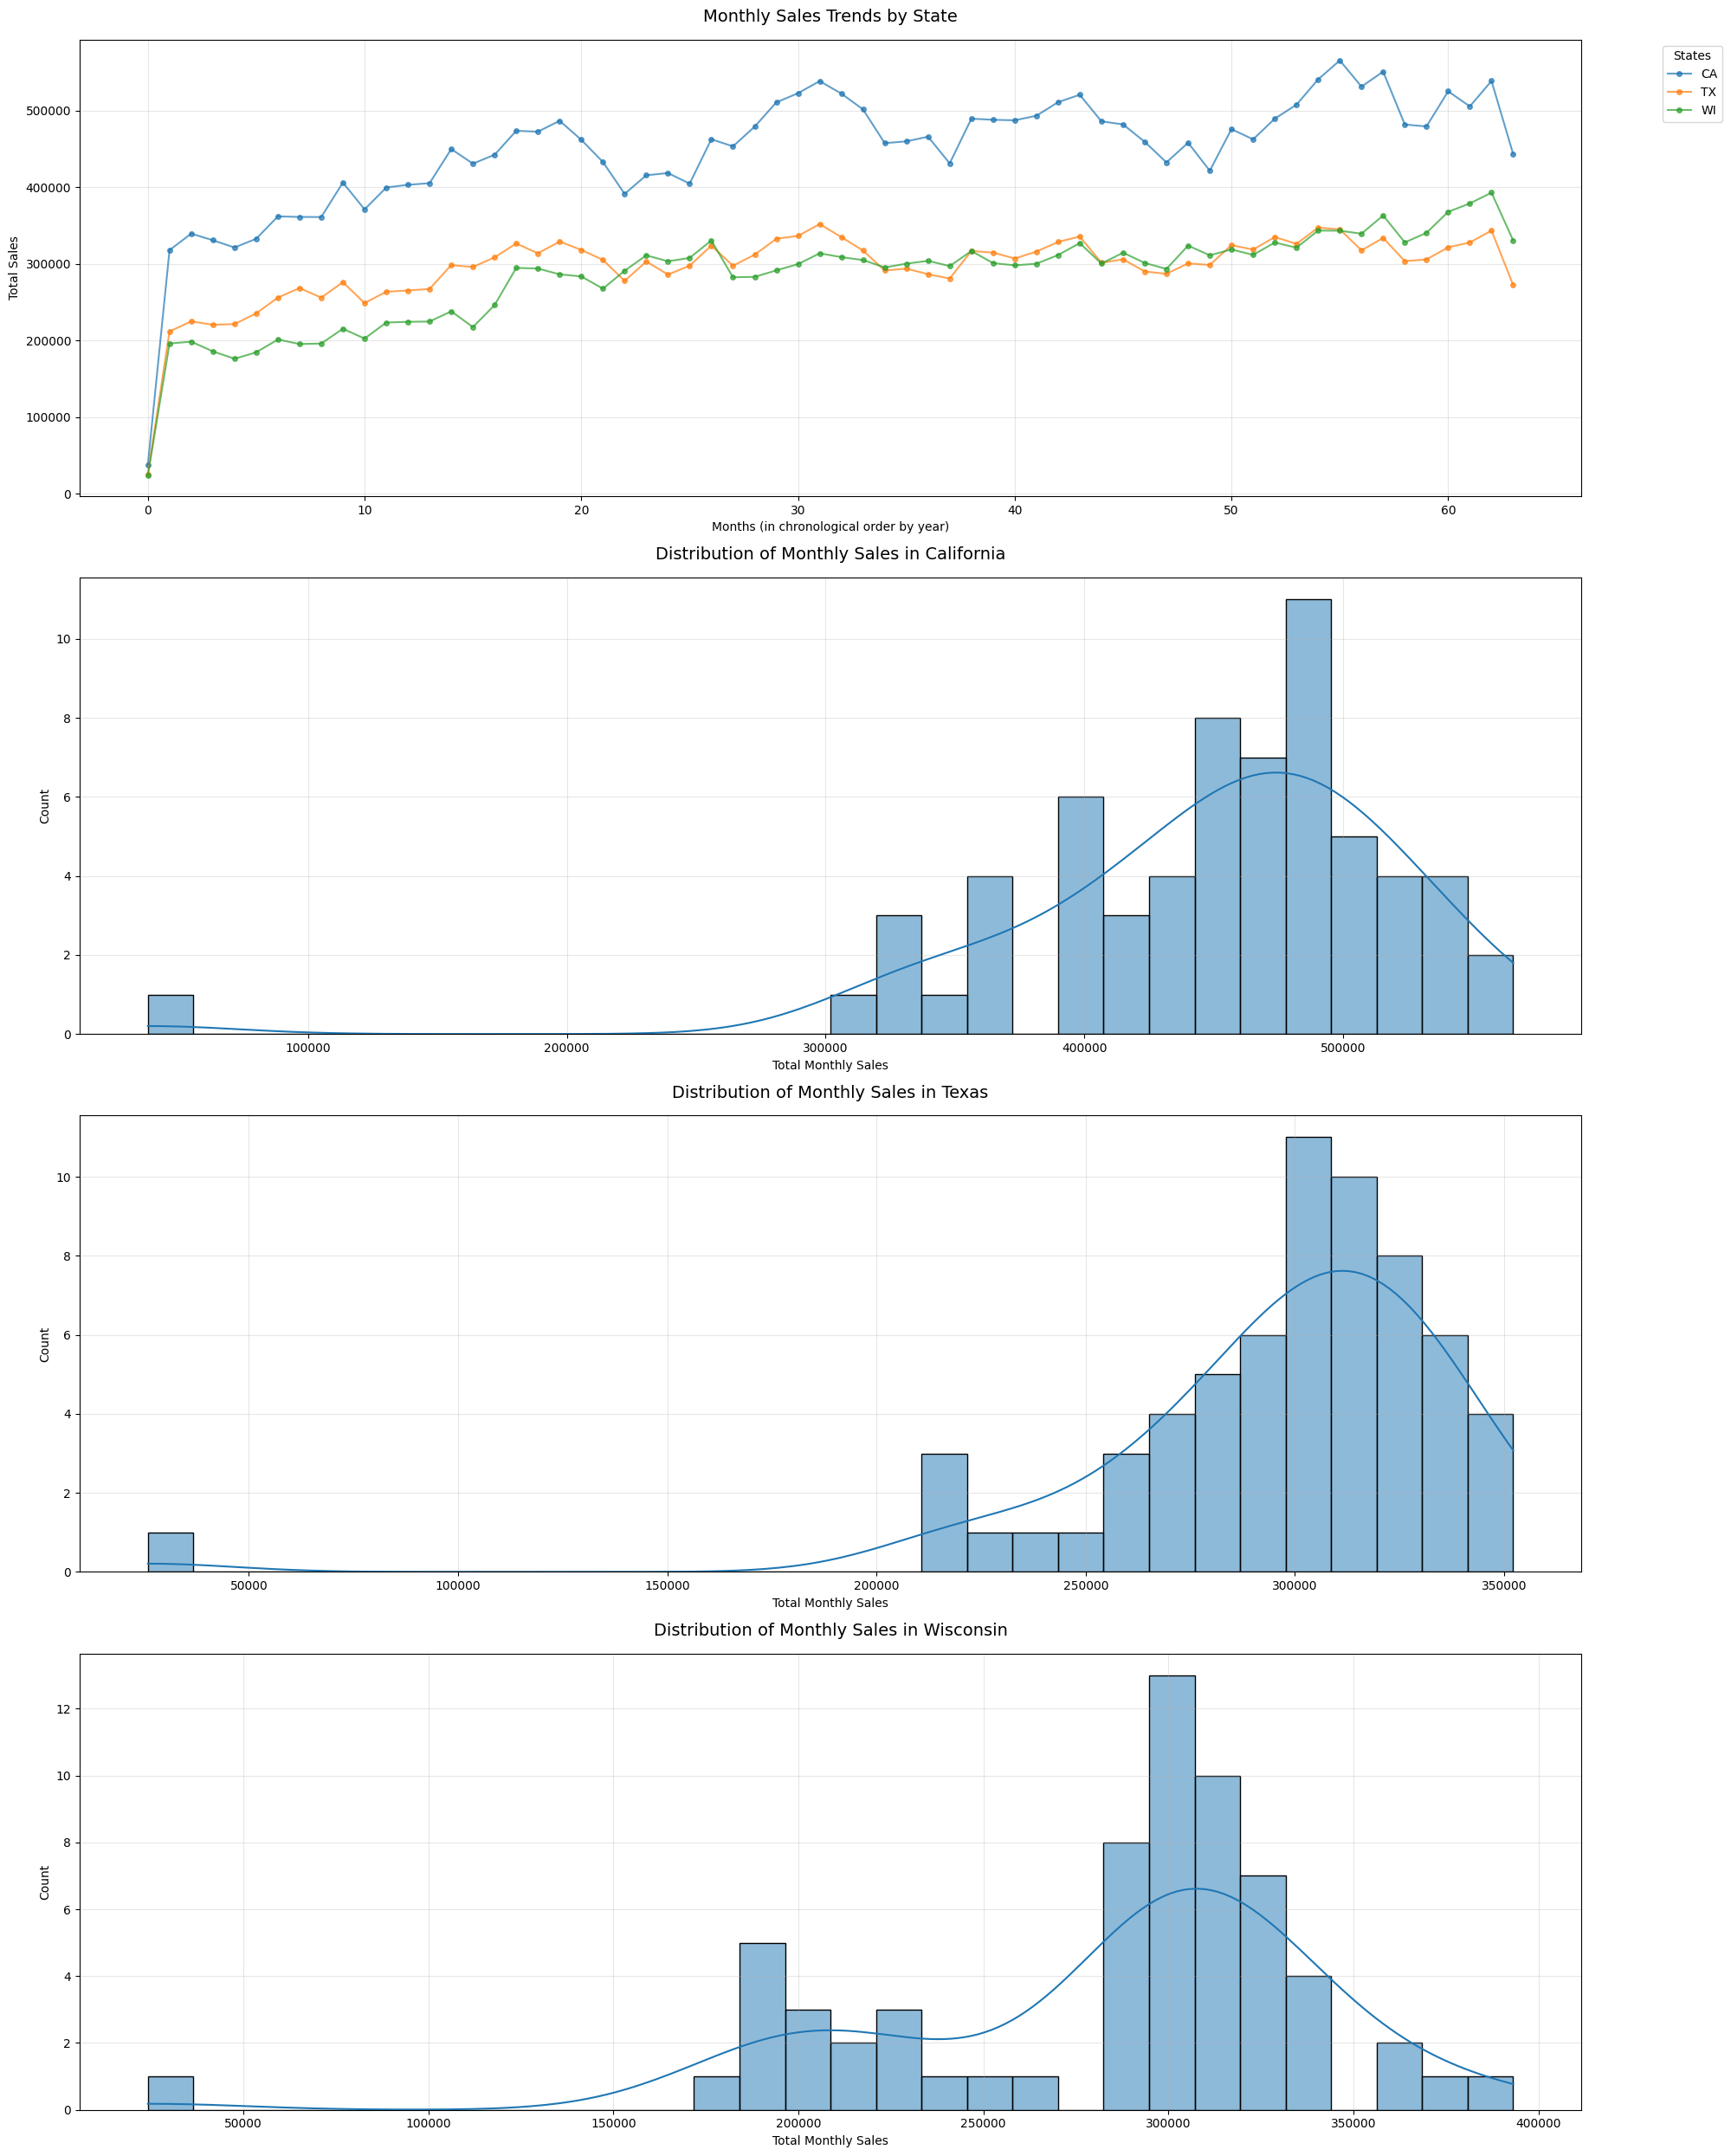


Summary Statistics by State:

CA:
Average Monthly Sales: 448,055.42
Standard Deviation: 79,748.64
Minimum: 38,108.00
Maximum: 565,672.00
Median: 462,379.50

TX:
Average Monthly Sales: 295,296.97
Standard Deviation: 47,492.37
Minimum: 25,846.00
Maximum: 352,173.00
Median: 304,548.00

WI:
Average Monthly Sales: 283,138.38
Standard Deviation: 61,590.77
Minimum: 24,209.00
Maximum: 393,142.00
Median: 300,385.00


In [50]:
# Group data by year, month, and state
df_time = data.groupby(['year', 'month', 'state_id'])['sales'].sum().reset_index()

# Create the visualization
plt.figure(figsize=(20,25))

# Plot 1: Time series of sales by state
plt.subplot(411)
for state in ['CA', 'TX', 'WI']:
    state_data = df_time[df_time['state_id']==state]
    plt.plot(state_data['sales'].values, label=state, marker='o', markersize=4, alpha=0.7)

plt.grid(True, alpha=0.3)
plt.xlabel('Months (in chronological order by year)')
plt.ylabel('Total Sales')
plt.title("Monthly Sales Trends by State", fontsize=14, pad=15)
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Sales distribution for California
plt.subplot(412)
sns.histplot(data=df_time[df_time['state_id']=="CA"], x='sales', bins=30, kde=True)
plt.title("Distribution of Monthly Sales in California", fontsize=14, pad=15)
plt.xlabel("Total Monthly Sales")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)

# Plot 3: Sales distribution for Texas
plt.subplot(413)
sns.histplot(data=df_time[df_time['state_id']=="TX"], x='sales', bins=30, kde=True)
plt.title("Distribution of Monthly Sales in Texas", fontsize=14, pad=15)
plt.xlabel("Total Monthly Sales")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)

# Plot 4: Sales distribution for Wisconsin
plt.subplot(414)
sns.histplot(data=df_time[df_time['state_id']=="WI"], x='sales', bins=30, kde=True)
plt.title("Distribution of Monthly Sales in Wisconsin", fontsize=14, pad=15)
plt.xlabel("Total Monthly Sales")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics for each state
print("\nSummary Statistics by State:")
for state in ['CA', 'TX', 'WI']:
    state_stats = df_time[df_time['state_id']==state]['sales'].describe()
    print(f"\n{state}:")
    print(f"Average Monthly Sales: {state_stats['mean']:,.2f}")
    print(f"Standard Deviation: {state_stats['std']:,.2f}")
    print(f"Minimum: {state_stats['min']:,.2f}")
    print(f"Maximum: {state_stats['max']:,.2f}")
    print(f"Median: {state_stats['50%']:,.2f}")

The visibility of an advantage in sales for California is very clear

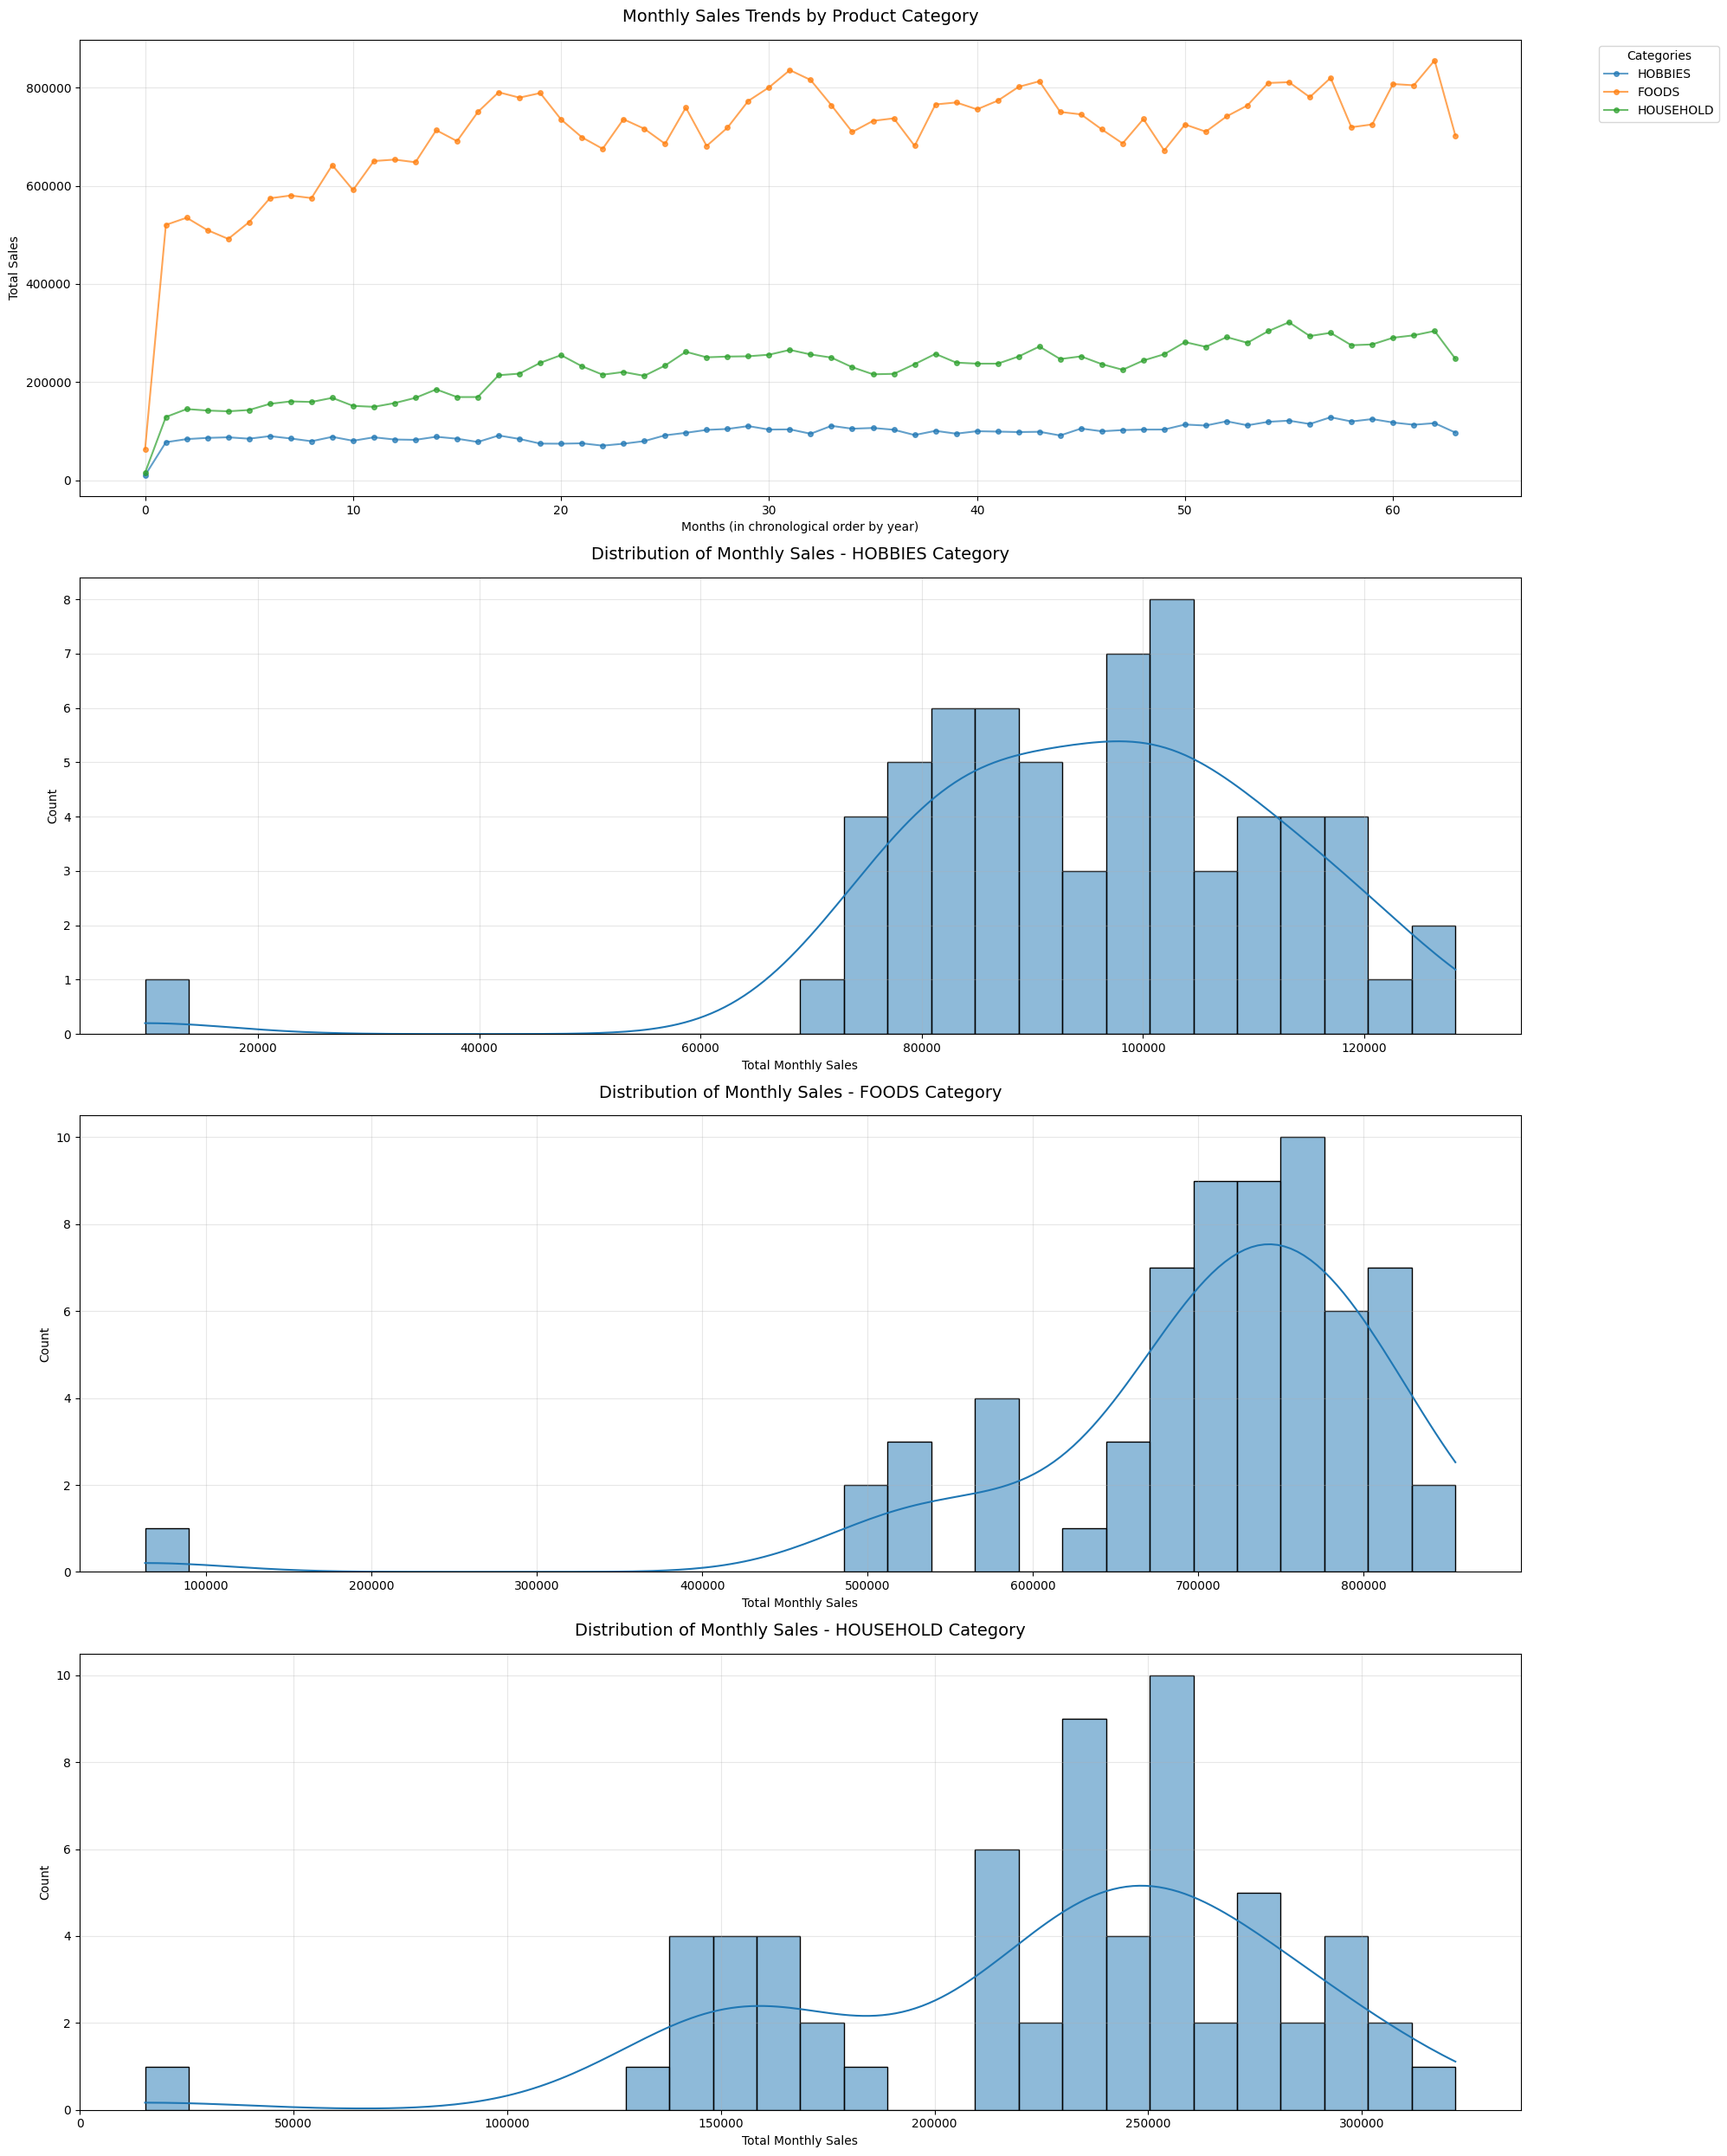


Summary Statistics by Product Category:

HOBBIES:
Average Monthly Sales: 95,700.00
Standard Deviation: 18,051.92
Minimum: 9,803.00
Maximum: 128,230.00
Median: 97,542.50

FOODS:
Average Monthly Sales: 704,530.30
Standard Deviation: 117,966.15
Minimum: 63,110.00
Maximum: 855,454.00
Median: 728,667.50

HOUSEHOLD:
Average Monthly Sales: 226,260.47
Standard Deviation: 56,414.15
Minimum: 15,250.00
Maximum: 321,877.00
Median: 238,359.00

Percentage of Total Sales by Category:
HOBBIES: 9.32%
FOODS: 68.63%
HOUSEHOLD: 22.04%


In [51]:
# Group data by year, month, and category
df_cat = data.groupby(['year', 'month', 'cat_id'])['sales'].sum().reset_index()

# Create the visualization
plt.figure(figsize=(20,25))

# Plot 1: Time series of sales by category
plt.subplot(411)
for category in ['HOBBIES', 'FOODS', 'HOUSEHOLD']:
    cat_data = df_cat[df_cat['cat_id']==category]
    plt.plot(cat_data['sales'].values, label=category, marker='o', markersize=4, alpha=0.7)

plt.grid(True, alpha=0.3)
plt.xlabel('Months (in chronological order by year)')
plt.ylabel('Total Sales')
plt.title("Monthly Sales Trends by Product Category", fontsize=14, pad=15)
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Sales distribution for HOBBIES
plt.subplot(412)
sns.histplot(data=df_cat[df_cat['cat_id']=="HOBBIES"], x='sales', bins=30, kde=True)
plt.title("Distribution of Monthly Sales - HOBBIES Category", fontsize=14, pad=15)
plt.xlabel("Total Monthly Sales")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)

# Plot 3: Sales distribution for FOODS
plt.subplot(413)
sns.histplot(data=df_cat[df_cat['cat_id']=="FOODS"], x='sales', bins=30, kde=True)
plt.title("Distribution of Monthly Sales - FOODS Category", fontsize=14, pad=15)
plt.xlabel("Total Monthly Sales")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)

# Plot 4: Sales distribution for HOUSEHOLD
plt.subplot(414)
sns.histplot(data=df_cat[df_cat['cat_id']=="HOUSEHOLD"], x='sales', bins=30, kde=True)
plt.title("Distribution of Monthly Sales - HOUSEHOLD Category", fontsize=14, pad=15)
plt.xlabel("Total Monthly Sales")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics for each category
print("\nSummary Statistics by Product Category:")
for category in ['HOBBIES', 'FOODS', 'HOUSEHOLD']:
    cat_stats = df_cat[df_cat['cat_id']==category]['sales'].describe()
    print(f"\n{category}:")
    print(f"Average Monthly Sales: {cat_stats['mean']:,.2f}")
    print(f"Standard Deviation: {cat_stats['std']:,.2f}")
    print(f"Minimum: {cat_stats['min']:,.2f}")
    print(f"Maximum: {cat_stats['max']:,.2f}")
    print(f"Median: {cat_stats['50%']:,.2f}")

# Calculate percentage of total sales for each category
total_sales = df_cat['sales'].sum()
print("\nPercentage of Total Sales by Category:")
for category in ['HOBBIES', 'FOODS', 'HOUSEHOLD']:
    cat_total = df_cat[df_cat['cat_id']==category]['sales'].sum()
    percentage = (cat_total / total_sales) * 100
    print(f"{category}: {percentage:.2f}%")

The observation from these statistics are: The biggest average monthly sales are in FOODS category (Slightly more than 2/3 of the entire sales by category), and the lowest one in HOBBIES category. To summarize, we are going to use the last 28 days of data for testing model performance. The next step to take will be trying out to use feature engineering techniques on this data.